In [1]:
import pyreadstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import kruskal
from scipy.stats import chi2_contingency

In [2]:
# Utilisez pyreadstat pour lire le fichier SAS
dataframe_sas, meta = pyreadstat.read_sas7bdat('../data/base_finale_cible_2.sas7bdat')

# Afficher le DataFrame résultant
print(dataframe_sas)

            date cible_2     NUMTECPRS  Engagement_prorat CODNAF2  \
0       202201.0       0  9.100000e+02            1245.71   4772A   
1       202201.0       0  1.570800e+04           22453.26   4711B   
2       202201.0       0  3.075800e+04           12770.09   8623Z   
3       202201.0       0  6.949600e+04          114002.53   8623Z   
4       202201.0       0  8.736000e+04           12970.63   4789Z   
...          ...     ...           ...                ...     ...   
596047  202212.0       1  1.341477e+11              67.02   4759B   
596048  202212.0       1  1.341632e+11              36.49   8623Z   
596049  202212.0       1  1.342214e+11               3.43   8690F   
596050  202212.0       1  1.342678e+11            6957.06   6910Z   
596051  202212.0       1  1.343004e+11              59.77   8121Z   

                     SEC_DER COULEUR_PART_M COULEUR_PART_MM3_M   AGE  \
0       Comm détail non alim           Vert          Vert_Vert  64.0   
1           Comm détail ali

In [4]:
dataframe_sas.shape

(596052, 185)

In [5]:
dataframe_sas.columns.tolist()

['date',
 'cible_2',
 'NUMTECPRS',
 'Engagement_prorat',
 'CODNAF2',
 'SEC_DER',
 'COULEUR_PART_M',
 'COULEUR_PART_MM3_M',
 'AGE',
 'CODETAJUR',
 'CODTYPPRS',
 'LIBCSPCMP',
 'NBOPECAR',
 'NBOPECARGLISS_M12',
 'MNTOPECAR',
 'NBPMTCAR',
 'NBPMTCARGLISS_M12',
 'MNTPMTCAR',
 'NBRETCAR',
 'NBRETCARGLISS_M12',
 'MNTRETCAR',
 'NBECRCRD',
 'MNTECRCRD',
 'NBECRDBT',
 'MNTECRDBT',
 'NBVIRPONEMI',
 'NBVIRPONEMIGLISS_M12',
 'MNTVIRPONEMI',
 'NBCHQEMI',
 'NBCHQEMIGLISS_M12',
 'MNTCHQEMI',
 'NBPLV',
 'MNTPLV',
 'NBVIRPONRCP',
 'MNTVIRPONRCP',
 'NBVIRPEREMI',
 'MNTVIRPEREMI',
 'MNTTOTMVTAFF',
 'MNTTOTMVTAFFGLISS_M12',
 'MNTECSCPTEPA',
 'NBECRCRD_mm1',
 'MNTECRCRD_mm1',
 'NBECRDBT_mm1',
 'MNTECRDBT_mm1',
 'NBPLV_mm1',
 'MNTPLV_mm1',
 'MNTTOTMVTAFF_mm1',
 'MNTTOTMVTAFFGLISS_M12_mm1',
 'NBECRCRD_mm3',
 'MNTECRCRD_mm3',
 'NBECRDBT_mm3',
 'MNTECRDBT_mm3',
 'NBPLV_mm3',
 'MNTPLV_mm3',
 'MNTTOTMVTAFF_mm3',
 'MNTTOTMVTAFFGLISS_M12_mm3',
 'NBECRCRD_mm12',
 'MNTECRCRD_mm12',
 'NBECRDBT_mm12',
 'MNTECRDBT_mm12'

In [6]:
dataframe_sas.NUMTECPRS

0         9.100000e+02
1         1.570800e+04
2         3.075800e+04
3         6.949600e+04
4         8.736000e+04
              ...     
596047    1.341477e+11
596048    1.341632e+11
596049    1.342214e+11
596050    1.342678e+11
596051    1.343004e+11
Name: NUMTECPRS, Length: 596052, dtype: float64

Le doublon (date,NUMTECPRS) est la clée primaire de la table on va vérifier qu'il n'y est pas de doublons.

In [7]:
# Vérifiez les duplications pour la combinaison (date, NUMTECPRS)
duplications_cle_primaire = dataframe_sas.duplicated(subset=['date', 'NUMTECPRS'])

# Affichez le nombre total de duplications pour la clé primaire
print(f'Nombre total de doublons pour la clé primaire : {duplications_cle_primaire.sum()}')

Nombre total de doublons pour la clé primaire : 0


Les clients sont identifiés avec la variable NUMTECPRS, on va chercher combien il y a de clients différents.

In [8]:
# Obtenez le nombre de clients différents
nombre_clients_differents = dataframe_sas['NUMTECPRS'].nunique()

# Affichez le nombre de clients différents
print(f'Nombre de clients différents : {nombre_clients_differents}')

Nombre de clients différents : 144411


In [9]:
# Obtenez une liste des variables quantitatives
list_variables_quantitatives = dataframe_sas.select_dtypes(include=['number']).columns.tolist()

# Affichez les listes de variables
print('Variables quantitatives :', list_variables_quantitatives)
len(list_variables_quantitatives)

Variables quantitatives : ['date', 'NUMTECPRS', 'Engagement_prorat', 'AGE', 'NBOPECAR', 'NBOPECARGLISS_M12', 'MNTOPECAR', 'NBPMTCAR', 'NBPMTCARGLISS_M12', 'MNTPMTCAR', 'NBRETCAR', 'NBRETCARGLISS_M12', 'MNTRETCAR', 'NBECRCRD', 'MNTECRCRD', 'NBECRDBT', 'MNTECRDBT', 'NBVIRPONEMI', 'NBVIRPONEMIGLISS_M12', 'MNTVIRPONEMI', 'NBCHQEMI', 'NBCHQEMIGLISS_M12', 'MNTCHQEMI', 'NBPLV', 'MNTPLV', 'NBVIRPONRCP', 'MNTVIRPONRCP', 'NBVIRPEREMI', 'MNTVIRPEREMI', 'MNTTOTMVTAFF', 'MNTTOTMVTAFFGLISS_M12', 'MNTECSCPTEPA', 'NBECRCRD_mm1', 'MNTECRCRD_mm1', 'NBECRDBT_mm1', 'MNTECRDBT_mm1', 'NBPLV_mm1', 'MNTPLV_mm1', 'MNTTOTMVTAFF_mm1', 'MNTTOTMVTAFFGLISS_M12_mm1', 'NBECRCRD_mm3', 'MNTECRCRD_mm3', 'NBECRDBT_mm3', 'MNTECRDBT_mm3', 'NBPLV_mm3', 'MNTPLV_mm3', 'MNTTOTMVTAFF_mm3', 'MNTTOTMVTAFFGLISS_M12_mm3', 'NBECRCRD_mm12', 'MNTECRCRD_mm12', 'NBECRDBT_mm12', 'MNTECRDBT_mm12', 'NBPLV_mm12', 'MNTPLV_mm12', 'MNTTOTMVTAFF_mm12', 'MNTTOTMVTAFFGLISS_M12_mm12', 'NBJ_ARR', 'IMPAYE', 'DEPASSEMENT', 'NBJ_ARR_mm1', 'NBJ_ARR_mm1

153

In [10]:
# Obtenez une liste des variables qualitatives
list_variables_qualitatives = dataframe_sas.select_dtypes(include=['object']).columns.tolist()

print('Variables qualitatives :', list_variables_qualitatives)
len(list_variables_qualitatives)

Variables qualitatives : ['cible_2', 'CODNAF2', 'SEC_DER', 'COULEUR_PART_M', 'COULEUR_PART_MM3_M', 'CODETAJUR', 'CODTYPPRS', 'LIBCSPCMP', 'Type_fdc_dm', 'cible_1', 'cible_3', 'CHR_USAGE_NDB_V1_4', 'CHR_USAGE_mm1', 'CHR_USAGE_mm3', 'CHR_USAGE_mm6', 'CODACVPRO', 'COULEUR_IRPRO', 'COULEUR_IRPRO_mm1', 'Degra_IRPRO_1pt_par_2m', 'Degra_IRPRO_2pt_par_2m', 'Degra_IRPRO_continue_3dm', 'Degra_IRPRO_mm1', 'Degra_IRPRO_mm3', 'Degra_couleur_IRPRO_mm1', 'INDDBLRLNPAR', 'INDRSKITDBDF', 'IRPRO_rouge_3dm', 'NDB_12dm', 'NDB_6dm', 'NDB_3dm', 'TOP_SCI', 'classe_finale_NDB']


32

In [11]:
dataframe_sas[list_variables_qualitatives].head(5)

,cible_2,CODNAF2,SEC_DER,COULEUR_PART_M,COULEUR_PART_MM3_M,CODETAJUR,CODTYPPRS,LIBCSPCMP,Type_fdc_dm,cible_1,...,Degra_IRPRO_mm3,Degra_couleur_IRPRO_mm1,INDDBLRLNPAR,INDRSKITDBDF,IRPRO_rouge_3dm,NDB_12dm,NDB_6dm,NDB_3dm,TOP_SCI,classe_finale_NDB
0,0,4772A,Comm détail non alim,Vert,Vert_Vert,1200,EI,COMMERCANTE,4- Aucun FDC spécifique,0,...,0,0,2,0,0,0,0,0,0,1
1,0,4711B,Comm détail alim,Vert,Vert_Vert,1200,EI,COMMERCANT,4- Aucun FDC spécifique,0,...,*,0,2,0,0,0,0,0,0,5
2,0,8623Z,Pro lib santé,Vert,Vert_Vert,1500,EI,CHIRURGIEN DENTISTE,4- Aucun FDC spécifique,0,...,0,0,2,0,0,0,0,0,0,1
3,0,8623Z,Pro lib santé,Vert,Vert_Vert,1500,EI,CHIRURGIEN DENTISTE,4- Aucun FDC spécifique,0,...,0,0,2,0,0,0,0,0,0,1
4,0,4789Z,Comm détail non alim,Vert,Vert_Vert,1200,EI,MARCHAND AMBULANT,4- Aucun FDC spécifique,0,...,0,0,2,0,0,0,0,0,0,2


In [12]:
# Obtenez les valeurs uniques de la variable cible_2
valeurs_uniques_cible_2 = dataframe_sas['cible_2'].unique()

# Affichez les valeurs uniques
print('Valeurs uniques de cible_2 :', valeurs_uniques_cible_2)

Valeurs uniques de cible_2 : ['0' '1']


Analyse descriptive :

In [13]:
type((dataframe_sas['cible_2'].astype(int)).sum())

numpy.int64

In [6]:
print('Il y a',(dataframe_sas['cible_2'].astype(int)).sum(),'clients qui ont eu un événement qui déclenche la cible_2. Soit',round((dataframe_sas['cible_2'].astype(int)).sum()/len(dataframe_sas)*100,2),'% des clients.')

Il y a 17641 clients qui ont eu un événement qui déclenche la cible_2. Soit 2.96 % des clients.


C:\Users\cedri\AppData\Local\Temp\ipykernel_1004\4108101686.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graph_cible_date['cible_2'] = dataframe_sas['cible_2'].astype(int)


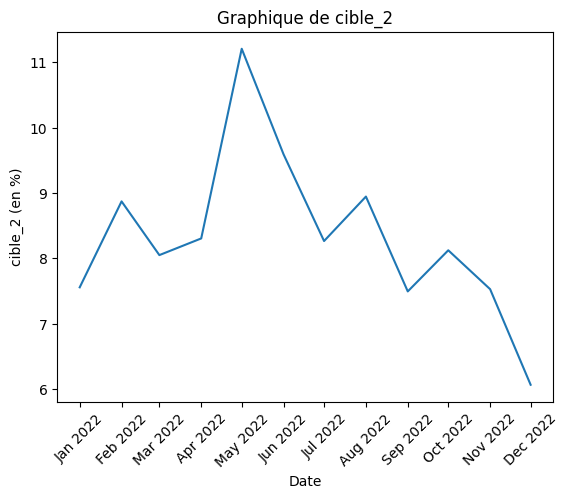

In [34]:
# Calculate the ratio cible_2/len(dataframe_sas)
df_graph_cible_date = dataframe_sas[['cible_2','date']]
df_graph_cible_date['cible_2'] = dataframe_sas['cible_2'].astype(int)

# Group by date
df_grouped = df_graph_cible_date.groupby('date').sum()

# Calculate the percentage
df_grouped['cible_2_percentage'] = df_grouped['cible_2'] / len(dataframe_sas[dataframe_sas['cible_2'] == '1']) * 100

# Convert the date column to datetime format
df_grouped.index = pd.to_datetime(df_grouped.index, format='%Y%m')

# Plot the graph
fig, ax = plt.subplots()
ax.plot(df_grouped.index, df_grouped['cible_2_percentage'])

# Set the x-axis tick format to display months
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xlabel('Date')
plt.ylabel('cible_2 (en %)')
plt.title('Graphique de cible_2')
plt.xticks(rotation=45)

plt.show()

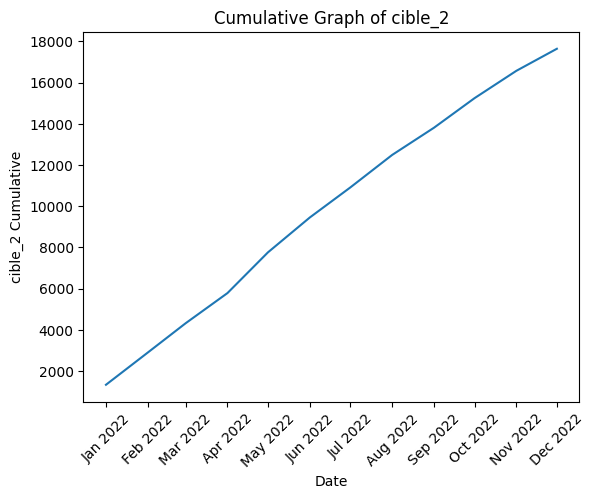

In [29]:
# Calculate the cumulative sum of cible_2
df_grouped['cible_2_cumulative'] = df_grouped['cible_2'].cumsum()

# Plot the cumulative graph
fig, ax = plt.subplots()
ax.plot(df_grouped.index, df_grouped['cible_2_cumulative'])

# Set the x-axis tick format to display months
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xlabel('Date')
plt.ylabel('cible_2 Cumulative')
plt.title('Cumulative Graph of cible_2')
plt.xticks(rotation=45)

plt.show()

On va étudier la corrélation entre la variable à expliquer et les variables explicatives.

In [16]:
# Obtenez un résumé statistique des variables quantitatives sélectionnées
resume_statistique = dataframe_sas[list_variables_quantitatives].describe()

# Affichez le résumé statistique
print("Résumé statistique des variables quantitatives sélectionnées :")
print(resume_statistique)

Résumé statistique des variables quantitatives sélectionnées :
                date     NUMTECPRS  Engagement_prorat            AGE  \
count  596052.000000  5.960520e+05       5.960520e+05  176853.000000   
mean   202206.426891  6.665445e+10       8.869935e+04      49.527314   
std         3.452379  3.897724e+10       3.248812e+05      12.314475   
min    202201.000000  9.100000e+02       1.736364e-01      18.000000   
25%    202203.000000  3.119075e+10       3.057423e+03      40.000000   
50%    202206.000000  6.443075e+10       2.060360e+04      50.000000   
75%    202209.000000  9.929997e+10       7.278822e+04      59.000000   
max    202212.000000  1.343995e+11       4.007512e+07      97.000000   

            NBOPECAR  NBOPECARGLISS_M12      MNTOPECAR       NBPMTCAR  \
count  596045.000000      596045.000000  596045.000000  596045.000000   
mean       12.742118         147.837393    1322.520693      12.307728   
std        20.768327         217.954029    2709.186824      20.170003

On étudit maintenant les valeurs manquantes des variables.

Analyse des variables données:

In [4]:
list_var=['COULEUR_PART_M','CRTOD_CMT_IND_0036','LIBCSPCMP','NBJDEB_NA','PRORGL_FILLER_NUM07','SEC_DER']

In [5]:
df_6_vars=dataframe_sas[list_var]

In [19]:
df_6_vars.head(10)

,COULEUR_PART_M,CRTOD_CMT_IND_0036,LIBCSPCMP,NBJDEB_NA,PRORGL_FILLER_NUM07,SEC_DER
0,Vert,0.0,COMMERCANTE,0.0,-1.0,Comm détail non alim
1,Vert,0.0,COMMERCANT,0.0,-1.0,Comm détail alim
2,Vert,0.0,CHIRURGIEN DENTISTE,0.0,-1.0,Pro lib santé
3,Vert,0.0,CHIRURGIEN DENTISTE,0.0,-1.0,Pro lib santé
4,Vert,0.0,MARCHAND AMBULANT,0.0,-1.0,Comm détail non alim
5,Vert,0.0,PHARMACIEN,11.0,-1.0,Pharmacie
6,Vert,0.0,ANTIQUAIRE,0.0,-1.0,Comm détail non alim
7,Orange,0.0,SANS PROFESSION,3.0,-1.0,Comm détail non alim
8,Orange,0.0,ARTISAN,0.0,-1.0,Comm détail non alim
9,Vert,0.0,ELECTRICIEN,0.0,-1.0,Artisan


In [21]:
# Affiche le type de chaque variable
print("Types de variables :")
print(df_6_vars.dtypes)

Types de variables :
COULEUR_PART_M          object
CRTOD_CMT_IND_0036     float64
LIBCSPCMP               object
NBJDEB_NA              float64
PRORGL_FILLER_NUM07    float64
SEC_DER                 object
dtype: object


In [48]:
dataframe_sas[list_var+['cible_2']].groupby('cible_2').describe()

CRTOD_CMT_IND_0036                                                 \
                     count          mean           std           min  25%   
cible_2                                                                     
0                 578411.0 -1.506877e+06  1.145374e+07 -1.581807e+09  0.0   
1                  17641.0 -6.565311e+05  6.520811e+06 -3.900000e+08  0.0   

                             NBJDEB_NA             ...              \
         50%  75%        max     count       mean  ...   75%   max   
cible_2                                            ...               
0        0.0  0.0  5000000.0  578411.0   4.960151  ...   0.0  92.0   
1        0.0  0.0  5000000.0   17641.0  23.177031  ...  36.0  92.0   

        PRORGL_FILLER_NUM07                                                   \
                      count       mean         std     min  25%   50%    75%   
cible_2                                                                        
0                  578411.0  92.460593  130.542243 -1449.0 -1.0  45.0  135.0   
1                   17641.0  70.362678   99.685235  -689.0 -1.0  37.0   96.0   

                 
            max  
cible_2          
0        2575.0  
1        1471.0  

[2 rows x 24 columns]

In [22]:
# Obtenez une liste des variables quantitatives
list_variables_quantitatives_6_vars = df_6_vars.select_dtypes(include=['number']).columns.tolist()

# Obtenez une liste des variables qualitatives
list_variables_qualitatives_6_vars = df_6_vars.select_dtypes(include=['object']).columns.tolist()

In [38]:
# Obtenez le nombre de valeurs manquantes par variable
valeurs_manquantes_par_variable_6 = df_6_vars.isnull().sum()

# Affichez le nombre de valeurs manquantes devant le nom de chaque variable
for variable, manquants in valeurs_manquantes_par_variable_6.items():
    print(f"{variable}: {manquants} valeurs manquantes")

COULEUR_PART_M: 0 valeurs manquantes
CRTOD_CMT_IND_0036: 0 valeurs manquantes
LIBCSPCMP: 0 valeurs manquantes
NBJDEB_NA: 0 valeurs manquantes
PRORGL_FILLER_NUM07: 0 valeurs manquantes
SEC_DER: 0 valeurs manquantes


In [25]:
for column in df_6_vars.columns:
    unique_values = df_6_vars[column].unique()
    num_unique_values = len(unique_values)
    print(f"Unique values for {column}: {unique_values}")
    print(f"Number of unique values for {column}: {num_unique_values}")

Unique values for COULEUR_PART_M: ['Vert' 'Orange' 'NC' 'Rouge' 'NN']
Number of unique values for COULEUR_PART_M: 5
Unique values for CRTOD_CMT_IND_0036: [       0.  1960425.  2621478. ...  2348621.  2142609. -6950708.]
Number of unique values for CRTOD_CMT_IND_0036: 143732
Unique values for LIBCSPCMP: ['COMMERCANTE' 'COMMERCANT' 'CHIRURGIEN DENTISTE' ... 'PLIBERALE'
 'ASSISTANT MARKETING' 'VENTE A DISTANCE EN AUTOENTREPRE']
Number of unique values for LIBCSPCMP: 7492
Unique values for NBJDEB_NA: [ 0. 11.  3.  2.  8. 49. 32. 55. 18.  6.  9.  1. 13. 36. 10. 23. 63.  7.
 12. 24. 31. 48. 25.  5. 15. 38.  4. 88. 40. 66. 29. 44. 92. 87. 16. 21.
 56. 17. 28. 20. 14. 34. 83. 81. 27. 37. 30. 67. 46. 43. 62. 64. 65. 33.
 19. 45. 22. 82. 77. 47. 39. 52. 78. 86. 60. 90. 26. 42. 76. 79. 58. 53.
 69. 68. 41. 57. 51. 89. 50. 75. 61. 71. 80. 74. 35. 70. 72. 84. 54. 73.
 59. 85. 91.]
Number of unique values for NBJDEB_NA: 93
Unique values for PRORGL_FILLER_NUM07: [ -1. 576. 557. ... 875. 834. 854.]
Nu

In [26]:
# Remplacez les valeurs 'NN' et 'NC' par NaN
df_6_vars.replace(['NN', 'NC'], np.nan, inplace=True)

# Calcule le nombre de valeurs manquantes par colonne
nb_valeurs_manquantes_par_colonne = df_6_vars.isnull().sum()

# Affiche le nombre de valeurs manquantes par colonne
print(nb_valeurs_manquantes_par_colonne)

COULEUR_PART_M         443252
CRTOD_CMT_IND_0036          0
LIBCSPCMP                   0
NBJDEB_NA                   0
PRORGL_FILLER_NUM07         0
SEC_DER                     0
dtype: int64


C:\Users\cedri\AppData\Local\Temp\ipykernel_7512\2386969423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6_vars.replace(['NN', 'NC'], np.nan, inplace=True)


In [27]:
print('la variables Couleur_part_m contient',df_6_vars['COULEUR_PART_M'].isnull().sum()/len(df_6_vars)*100,'% de valeurs manquantes')

la variables Couleur_part_m contient 74.36465274841792 % de valeurs manquantes


La variable COULEUR_PART_M contient 443252 valeurs manquantes on ne l'utilisera pas

Nous allons étudier les valeurs aberrantes et extrêmes des 6 variables

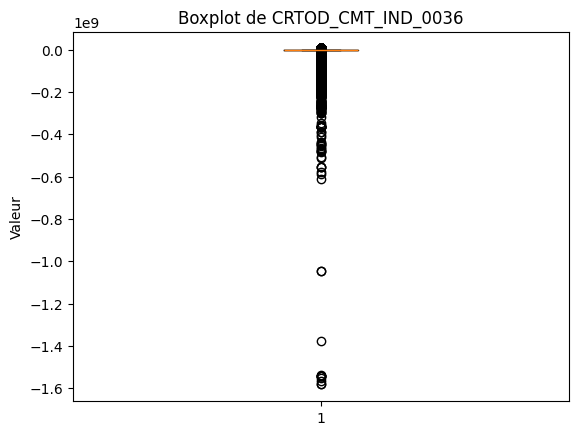

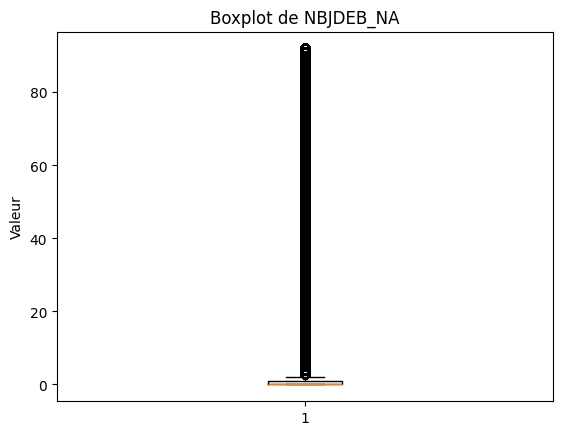

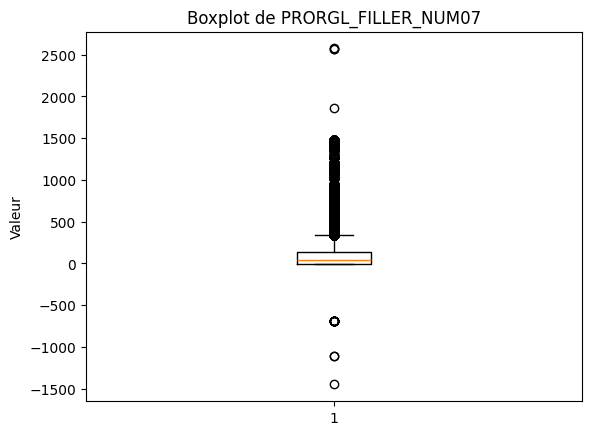

In [28]:
# Get the quantitative variables
quantitative_variables = df_6_vars.select_dtypes(include=['number']).columns.tolist()

# Create a boxplot for each variable
for variable in quantitative_variables:
    plt.boxplot(df_6_vars[variable])
    plt.title(f'Boxplot de {variable}')
    plt.ylabel('Valeur')
    plt.show()


In [29]:
max(df_6_vars['CRTOD_CMT_IND_0036'])

5000000.0

In [30]:
min(df_6_vars['CRTOD_CMT_IND_0036'])

-1581806625.0

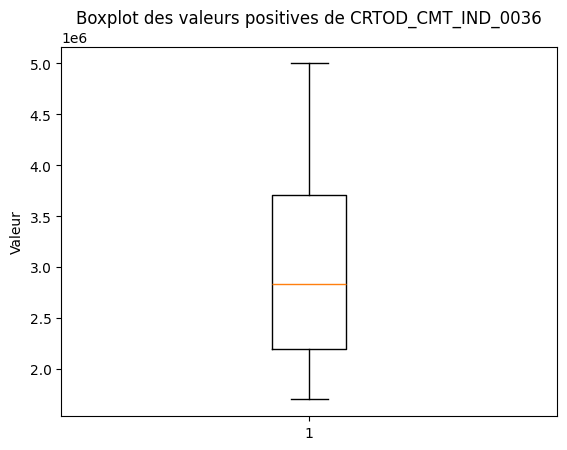

In [31]:
# Filtrer les valeurs positives
positive_values = df_6_vars['CRTOD_CMT_IND_0036'][df_6_vars['CRTOD_CMT_IND_0036'] > 0]

# Crée un boxplot pour les valeurs positives
plt.boxplot(positive_values)
plt.title('Boxplot des valeurs positives de CRTOD_CMT_IND_0036')
plt.ylabel('Valeur')

# Affiche le boxplot
plt.show()

In [32]:
# Calcule le pourcentage de valeurs négatives
percentage_negative = (df_6_vars['CRTOD_CMT_IND_0036'] < 0).mean() * 100

# Affiche le pourcentage de valeurs négatives
print(f"Pourcentage de valeurs négatives dans CRTOD_CMT_IND_0036 : {percentage_negative:.2f}%")

Pourcentage de valeurs négatives dans CRTOD_CMT_IND_0036 : 11.59%


In [33]:
# Calcule le pourcentage de valeurs négatives
percentage_negative = (df_6_vars['CRTOD_CMT_IND_0036'] == 0).mean() * 100

# Affiche le pourcentage de valeurs négatives
print(f"Pourcentage de valeurs nulles dans CRTOD_CMT_IND_0036 : {percentage_negative:.2f}%")

Pourcentage de valeurs nulles dans CRTOD_CMT_IND_0036 : 73.80%


Variables inutilisables car quasiment tous les montants sont négatifs ou nul (informations concentré).

On étudie le libéllé des profession var : LIBCSPCMP

In [34]:
# Comptez les occurrences de chaque catégorie
counts = df_6_vars['LIBCSPCMP'].value_counts()

print(counts)

LIBCSPCMP
                                    419753
CHIRURGIEN DENTISTE                  15014
ARTISANS SERVICES AUX PARTICULIE     10542
MEDECIN SPECIALISTE LIBERAL           9677
ARTISAN DU BATIMENT ET DES TRAVA      9031
                                     ...  
PROPRIETAIRE CHAMBRE D HOTES             1
CHAUFFEUR AMBASSADE                      1
NETTOYAGE INDUSTRIEL ET AU PARTI         1
MEDECIN LIBERAL ET SALARI                1
VENTE A DISTANCE EN AUTOENTREPRE         1
Name: count, Length: 7492, dtype: int64


In [35]:
dataframe_sas['LIBCSPCMP'].nunique()

7492

In [36]:
# Filtrer les libellés qui contiennent "LIBERAL"
filtered_data = df_6_vars[df_6_vars['LIBCSPCMP'].str.contains('MEDECIN')]

# Comptez les occurrences de chaque catégorie après le filtrage
counts = filtered_data['LIBCSPCMP'].value_counts()
print(counts)

LIBCSPCMP
MEDECIN SPECIALISTE LIBERAL        9677
MEDECIN GENERALISTE LIBERAL        5663
PSYCH... (NON MEDECIN)             2491
MEDECIN                            1942
MEDECIN GENERALISTE                1498
                                   ... 
MEDECIN ACUPUNCTEUR                   1
MEDECINE VASCULAIRE ANGIOLOGUE        1
MEDECIN INTERNE                       1
MEDECIN READAPTATION PHYSIQUE         1
THERAPEUTE EN MEDECINE CHINOISE       1
Name: count, Length: 155, dtype: int64


Etude secteur d'activité

In [37]:
print(df_6_vars['SEC_DER'].unique())
print(df_6_vars['SEC_DER'].nunique())

['Comm détail non alim' 'Comm détail alim' 'Pro lib santé' 'Pharmacie'
 'Artisan' 'Agriculture' 'OBSL' 'Pro lib hors santé' 'Divers' 'BTP' 'CHR'
 'Immobilier' 'industrie fabrication' 'Comm Gros non alim' 'transport'
 'S C I' 'Viticulture' 'Comm Gros alim' 'non renseignes']
19


In [37]:
# Obtenez le nombre d'observations par intitulé
observations_count = df_6_vars['SEC_DER'].value_counts()

# Affiche le résultat
print("Nombre d'observations par intitulé de SEC_DER :\n", observations_count)

Nombre d'observations par intitulé de SEC_DER :
 SEC_DER
Comm détail non alim     89925
Pro lib santé            83179
Artisan                  59221
Pro lib hors santé       56465
S C I                    50240
CHR                      50238
transport                33591
Divers                   29753
Comm détail alim         29175
Immobilier               22442
industrie fabrication    20763
OBSL                     20295
Comm Gros non alim       16961
BTP                      10552
non renseignes            6996
Agriculture               5485
Pharmacie                 4351
Comm Gros alim            4093
Viticulture               2327
Name: count, dtype: int64


In [38]:
# Créez un boxplot pour la variable SEC_DER
plt.boxplot(df_6_vars['SEC_DER'])
plt.title('Boxplot de la variable SEC_DER')
plt.ylabel('Valeur')

# Affiche le boxplot
plt.show()

la variables à 19 modalités on va devoir faire des regroupements.

In [8]:
# Obtenez le nombre de valeurs manquantes par variable
valeurs_manquantes_par_variable = dataframe_sas.isna().sum()

# Triez les variables par nombre de valeurs manquantes (en ordre décroissant)
valeurs_manquantes_par_variable = valeurs_manquantes_par_variable.sort_values(ascending=False)

# Affichez le nombre de valeurs manquantes devant le nom de chaque variable
for variable, manquants in valeurs_manquantes_par_variable.items():
    print(f"{variable}: {manquants} valeurs manquantes")

AGE: 419199 valeurs manquantes
CATTCEUR_abs_mm12: 191799 valeurs manquantes
CATTCEUR_mm12: 191549 valeurs manquantes
CATTCEUR: 170471 valeurs manquantes
EVOL_NB_SALARIE: 135475 valeurs manquantes
NB_SALARIES_abs_mm12: 135475 valeurs manquantes
MNTPLV_rel_mm12: 133295 valeurs manquantes
MNTTOTMVTAFF_rel_mm12: 130673 valeurs manquantes
NB_SALARIES_mm12: 126230 valeurs manquantes
MNTPLV_rel_mm3: 98562 valeurs manquantes
NBECRCRD_rel_mm12: 98330 valeurs manquantes
MNTECRCRD_rel_mm12: 98330 valeurs manquantes
MNTTOTMVTAFF_rel_mm3: 97926 valeurs manquantes
CRTOC_IND_0164_rel_mm3: 96924 valeurs manquantes
MNTTOTMVTAFF_rel_mm1: 93350 valeurs manquantes
MNTPLV_rel_mm1: 92114 valeurs manquantes
NBECRDBT_rel_mm12: 68899 valeurs manquantes
MNTECRDBT_rel_mm12: 68899 valeurs manquantes
MNTECRCRD_rel_mm3: 61471 valeurs manquantes
NBECRCRD_rel_mm3: 61471 valeurs manquantes
MNTECRCRD_abs_mm12: 55984 valeurs manquantes
MNTPLV_abs_mm12: 55984 valeurs manquantes
NBPLV_abs_mm12: 55984 valeurs manquantes
NB

In [38]:
# Comptez le nombre de lignes avec au moins une valeur manquante
nombre_lignes_avec_manquants = dataframe_sas.isna().any(axis=1).sum()

# Affichez le nombre de lignes avec au moins une valeur manquante
print("Nombre de lignes avec au moins une valeur manquante :", nombre_lignes_avec_manquants)

Nombre de lignes avec au moins une valeur manquante : 523142


In [39]:
print('Nombre de lignes sans aucune valeur manquante :',len(dataframe_sas)-nombre_lignes_avec_manquants)

Nombre de lignes sans aucune valeur manquante : 72910


Nous allons maintenant étudier le lien entre la variable explicatives 'cible_2' et les variables à expliquer quantitatives.

On vérifie qu'il n'y est pas une variable qui ne prenne qu'une valeur

In [40]:
# Get the number of unique values for each variable
unique_value_counts = dataframe_sas.nunique()

# Sort the unique value counts in ascending order
unique_value_counts = unique_value_counts.sort_values()

# Display the variable names and their corresponding unique value counts
print("Number of unique values for each variable:")
print(unique_value_counts[unique_value_counts < 5])
print('il y a ', len(unique_value_counts[unique_value_counts < 5]), 'variables avec moins de 5 valeurs uniques')


Number of unique values for each variable:
NBJ_ARR                     1
Degra_IRPRO_continue_3dm    2
cible_2                     2
TOP_SCI                     2
Degra_IRPRO_1pt_par_2m      2
Degra_IRPRO_2pt_par_2m      2
cible_1                     2
cible_3                     2
IRPRO_rouge_3dm             2
INDRSKITDBDF                3
NDB_12dm                    3
COULEUR_IRPRO               3
CODTYPPRS                   3
NDB_3dm                     3
NDB_6dm                     3
COULEUR_IRPRO_mm1           4
INDDBLRLNPAR                4
Type_fdc_dm                 4
dtype: int64
il y a  18 variables avec moins de 5 valeurs uniques


In [41]:
# Get the variables with less than 5 unique values
variables_with_few_unique_values = unique_value_counts[unique_value_counts < 5].index.tolist()

# Display the different modalities for each variable
for variable in variables_with_few_unique_values:
    unique_values = dataframe_sas[variable].unique()
    print(f"Variable: {variable}")
    print(f"Modalities: {unique_values}")
    print()

Variable: NBJ_ARR
Modalities: [0.]

Variable: Degra_IRPRO_continue_3dm
Modalities: ['0' '1']

Variable: cible_2
Modalities: ['0' '1']

Variable: TOP_SCI
Modalities: ['0' '1']

Variable: Degra_IRPRO_1pt_par_2m
Modalities: ['0' '1']

Variable: Degra_IRPRO_2pt_par_2m
Modalities: ['0' '1']

Variable: cible_1
Modalities: ['0' '1']

Variable: cible_3
Modalities: ['0' '1']

Variable: IRPRO_rouge_3dm
Modalities: ['0' '1']

Variable: INDRSKITDBDF
Modalities: ['0' '1' '.']

Variable: NDB_12dm
Modalities: ['0' '1' '.']

Variable: COULEUR_IRPRO
Modalities: ['1' '2' '3']

Variable: CODTYPPRS
Modalities: ['EI' 'PM' '']

Variable: NDB_3dm
Modalities: ['0' '.' '1']

Variable: NDB_6dm
Modalities: ['0' '1' '.']

Variable: COULEUR_IRPRO_mm1
Modalities: ['1' '2' '3' '4']

Variable: INDDBLRLNPAR
Modalities: ['2' '0' '1' '.']

Variable: Type_fdc_dm
Modalities: ['4- Aucun FDC spécifique' '2- Réseau - Amiable' '3- Réseau - GDDS'
 '1- Recouvrement']



On remarque que NBJ_ARR n'a que 0 comme modalité donc elle ne sera pas utile pour notre analyse

on regarde l'évolution temporelle de variable en fonction de la variable cible

In [42]:
df_evolution_temp=df_6_vars

df_evolution_temp['cible_2'] = dataframe_sas['cible_2']

# Group the dataframe by 'cible_2' and calculate the statistics for each group
grouped_stats = df_evolution_temp.groupby('cible_2').describe()

# Select the relevant statistics for the quantitative variables
quantitative_stats = grouped_stats[list_variables_quantitatives_6_vars]

# Display the statistics
print(quantitative_stats)


C:\Users\cedri\AppData\Local\Temp\ipykernel_7512\3990781581.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evolution_temp['cible_2'] = dataframe_sas['cible_2']


        CRTOD_CMT_IND_0036                                                 \
                     count          mean           std           min  25%   
cible_2                                                                     
0                 578411.0 -1.506877e+06  1.145374e+07 -1.581807e+09  0.0   
1                  17641.0 -6.565311e+05  6.520811e+06 -3.900000e+08  0.0   

                             NBJDEB_NA             ...              \
         50%  75%        max     count       mean  ...   75%   max   
cible_2                                            ...               
0        0.0  0.0  5000000.0  578411.0   4.960151  ...   0.0  92.0   
1        0.0  0.0  5000000.0   17641.0  23.177031  ...  36.0  92.0   

        PRORGL_FILLER_NUM07                                                   \
                      count       mean         std     min  25%   50%    75%   
cible_2                                                                        
0                  5784

On  va créer les échantillon de train et de test

In [43]:
# Split the dataframe into train and test samples
train_df, test_df = train_test_split(dataframe_sas, test_size=0.3, stratify=dataframe_sas['cible_2'], random_state=42)

# Print the shapes of the train and test samples
print("Train sample shape:", train_df.shape)
print("Test sample shape:", test_df.shape)


Train sample shape: (417236, 185)
Test sample shape: (178816, 185)


On vérifie que la stratification selon cible_2 a été bien réalisée

In [44]:
# Calculate the proportion of cible_2=1 in the train dataset
train_proportion = round(len(train_df[train_df['cible_2'] == '1']) / len(train_df)*100,3)

# Calculate the proportion of cible_2=1 in the test dataset
test_proportion = round(len(test_df[test_df['cible_2'] == '1']) / len(test_df)*100,3)

# Compare the proportions
if train_proportion == test_proportion:
    print("Train et Test ont tous les deux :", train_proportion,"% de défauts")
else:
    print("Train_df a : ", train_proportion, "% de défauts et test_df a : ", test_proportion, "% de défauts")

Train_df a :  2.96 % de défauts et test_df a :  2.959 % de défauts


La stratification a été respecté les deux échantillons ont environ 3% de défaut chacun.

On cherche la corréaltion ente la variable cible_2 et les variables quantitatives

In [13]:
# Liste des variables quantitatives
list_variables_quantitatives = dataframe_sas.select_dtypes(include=['number']).columns.tolist()

# Création d'un DataFrame pour stocker les résultats
resultats_kruskall_wallis = pd.DataFrame(columns=['Variable', 'Stat. test Kruskall-Wallis', 'p-valeur'])

# Calcul des statistiques Kruskall-Wallis pour chaque variable
for variable in list_variables_quantitatives:
    # Exclure les groupes où toutes les valeurs sont identiques
    groupes = [dataframe_sas[variable][dataframe_sas['cible_2'] == groupe].dropna() for groupe in dataframe_sas['cible_2'].unique() if len(set(dataframe_sas[variable][dataframe_sas['cible_2'] == groupe])) > 1]
    
    if len(groupes) > 1:  # Assurez-vous qu'il y a au moins deux groupes
        stat, p_value = kruskal(*groupes)

        # Ajout des résultats au DataFrame
        resultats_kruskall_wallis = pd.concat([resultats_kruskall_wallis, pd.DataFrame({
            'Variable': [variable],
            'Stat. test Kruskall-Wallis': [stat],
            'p-valeur': [p_value]
        })], ignore_index=True)

# Tri du DataFrame par Stat. test Kruskall-Wallis en ordre décroissant
resultats_kruskall_wallis = resultats_kruskall_wallis.sort_values(by='Stat. test Kruskall-Wallis', ascending=False)

# Affichage du DataFrame
print(resultats_kruskall_wallis)


C:\Users\cedri\AppData\Local\Temp\ipykernel_14368\2709067845.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultats_kruskall_wallis = pd.concat([resultats_kruskall_wallis, pd.DataFrame({


               Variable  Stat. test Kruskall-Wallis  p-valeur
57          DEPASSEMENT                23351.717745  0.000000
80            NBJDEB_NA                23266.498384  0.000000
64      DEPASSEMENT_6dm                22690.400633  0.000000
77             NBJDEPDP                22414.087526  0.000000
65     DEPASSEMENT_12dm                21367.063038  0.000000
..                  ...                         ...       ...
82   CRTOD_CMT_IND_0036                    3.441486  0.063578
75        NB_RESTRU_6dm                    3.197428  0.073754
70            NB_RESTRU                    2.196790  0.138299
1             NUMTECPRS                    1.449456  0.228615
149   CATTCEUR_abs_mm12                    0.123231  0.725556

[152 rows x 3 columns]


In [14]:
# Sélectionner les 10 premières lignes
top_10_p_values = resultats_kruskall_wallis.head(10)

# Affichage du DataFrame des 10 plus petites p-valeurs
print(top_10_p_values)

                 Variable  Stat. test Kruskall-Wallis  p-valeur
57            DEPASSEMENT                23351.717745       0.0
80              NBJDEB_NA                23266.498384       0.0
64        DEPASSEMENT_6dm                22690.400633       0.0
77               NBJDEPDP                22414.087526       0.0
65       DEPASSEMENT_12dm                21367.063038       0.0
63        DEPASSEMENT_3dm                21114.424497       0.0
95        NBJDEB_IND_0015                16600.654374       0.0
68           NBJ_ARR_12dm                16336.328006       0.0
92  NB_MOIS_AVEC_ARR_12dm                16138.269317       0.0
85          NBJDEB_NA_mm3                15352.412003       0.0


On étudit la corrélation entre la variable cible et les variables qualitatives

In [9]:
# Variable cible
cible = 'cible_2'

# Liste des variables qualitatives
list_variables_qualitatives = dataframe_sas.select_dtypes(include=['object']).columns.tolist()

list_variables_qualitatives.remove("cible_1")
list_variables_qualitatives.remove("cible_3")

# Création d'un DataFrame pour stocker les résultats
resultats_tests_qualitatifs = pd.DataFrame(columns=['Variable', 'Stat. du X2', 'p-valeur', 'V de Cramer', 'T de Tschupro'])

# Calcul des statistiques pour chaque variable qualitative
for variable in list_variables_qualitatives:
    if variable != cible:
        contingency_table = pd.crosstab(dataframe_sas[cible], dataframe_sas[variable])
        
        # Test du chi2_contingency
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        
        # Calcul du V de Cramer
        n = contingency_table.sum().sum()
        r, c = contingency_table.shape
        v_cramer = (chi2 / (n * (min(r, c) - 1)))**0.5
        
        # Calcul du T de Tschupro
        k1 = len(dataframe_sas[variable].unique())
        k2 = len(dataframe_sas[cible].unique())
        t_tschupro_max = ((min(k1 - 1, k2 - 1) / max(k1 - 1, k2 - 1))**(1/4))
        t_tschupro = (chi2 / (n * (k1 - 1) * (k2 - 1))**0.5)
        
        # Normalisation de T de Tschupro entre [1, T_max]
        t_tschupro_normalized = 1 + (t_tschupro_max - 1) * t_tschupro
        
        # Ajout des résultats au DataFrame
        resultats_tests_qualitatifs = pd.concat([resultats_tests_qualitatifs, pd.DataFrame({
            'Variable': [variable],
            'Stat. du X2': [chi2],
            'p-valeur': [p_value],
            'V de Cramer': [v_cramer],
            'T de Tschupro': [t_tschupro_normalized]
        })], ignore_index=True)

# Tri du DataFrame par V de Cramer du plus grand au plus petit
resultats_tests_qualitatifs = resultats_tests_qualitatifs.sort_values(by='V de Cramer', ascending=False)

# Affichage du DataFrame
print(resultats_tests_qualitatifs)


C:\Users\cedri\AppData\Local\Temp\ipykernel_14368\2528021973.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultats_tests_qualitatifs = pd.concat([resultats_tests_qualitatifs, pd.DataFrame({


                    Variable   Stat. du X2       p-valeur  V de Cramer  \
28         classe_finale_NDB  39904.790210   0.000000e+00     0.258744   
8         CHR_USAGE_NDB_V1_4  39138.061820   0.000000e+00     0.256246   
13             COULEUR_IRPRO  31834.659196   0.000000e+00     0.231104   
9              CHR_USAGE_mm1  31480.714883   0.000000e+00     0.229816   
14         COULEUR_IRPRO_mm1  26960.665026   0.000000e+00     0.212678   
10             CHR_USAGE_mm3  25223.465708   0.000000e+00     0.205712   
11             CHR_USAGE_mm6  21405.356610   0.000000e+00     0.189504   
23           IRPRO_rouge_3dm  18088.258891   0.000000e+00     0.174203   
6                  LIBCSPCMP  17127.208064   0.000000e+00     0.169512   
19           Degra_IRPRO_mm3   6848.604276   0.000000e+00     0.107191   
0                    CODNAF2   5002.916835   0.000000e+00     0.091616   
18           Degra_IRPRO_mm1   4625.923331   0.000000e+00     0.088096   
24                  NDB_12dm   3272.57

In [10]:
# Sélectionner les 10 premières lignes
top_10_quali_values = resultats_tests_qualitatifs.head(10)

# Affichage du DataFrame des 10 plus petites p-valeurs
print(top_10_quali_values)

              Variable   Stat. du X2  p-valeur  V de Cramer  T de Tschupro
28   classe_finale_NDB  39904.790210       0.0     0.258744      -5.460899
8   CHR_USAGE_NDB_V1_4  39138.061820       0.0     0.256246      -6.141946
13       COULEUR_IRPRO  31834.659196       0.0     0.231104      -3.638986
9        CHR_USAGE_mm1  31480.714883       0.0     0.229816      -4.446600
14   COULEUR_IRPRO_mm1  26960.665026       0.0     0.212678      -3.842129
10       CHR_USAGE_mm3  25223.465708       0.0     0.205712      -3.364009
11       CHR_USAGE_mm6  21405.356610       0.0     0.189504      -2.703424
23     IRPRO_rouge_3dm  18088.258891       0.0     0.174203       1.000000
6            LIBCSPCMP  17127.208064       0.0     0.169512       0.771236
19     Degra_IRPRO_mm3   6848.604276       0.0     0.107191      -0.249739


On va vérifier la dépendance entre les 10 variables quanti et les 10 variables quali les plus corrélé à cible_2

coefficient de corrélation de pearson

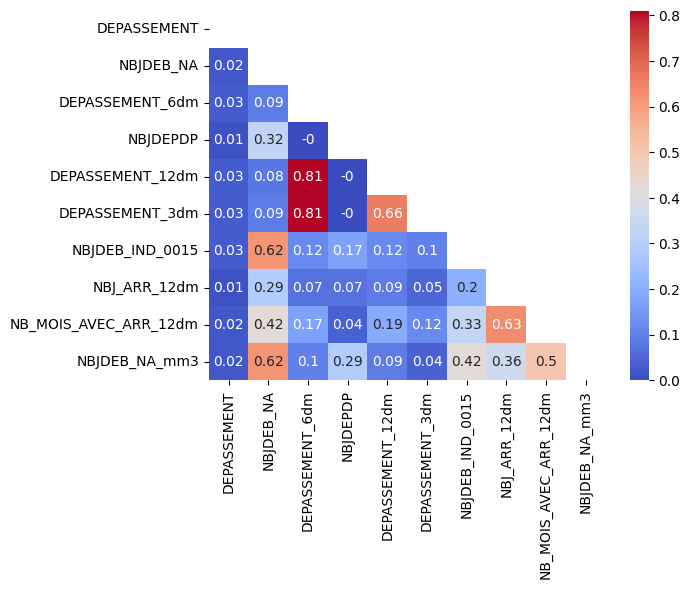

In [49]:
# Select the variables from top_10_p_values
variables = top_10_p_values['Variable'].tolist()

# Create a cross-tabulation of the selected variables
cross_tab = dataframe_sas[variables].corr().round(2)

mask = np.triu(np.ones_like(cross_tab, dtype=bool))

# Create a heatmap of the cross-tabulation
sns.heatmap(cross_tab, annot=True, cmap='coolwarm',mask=mask)

# Display the plot
plt.show()


depassement_12dm, depassement_3dm et depassement_6dm son très corrélé on ne garde ra que depassement_6dm car c'est la plus corrélé à cible_2

coefficient de corrélation de Spearman

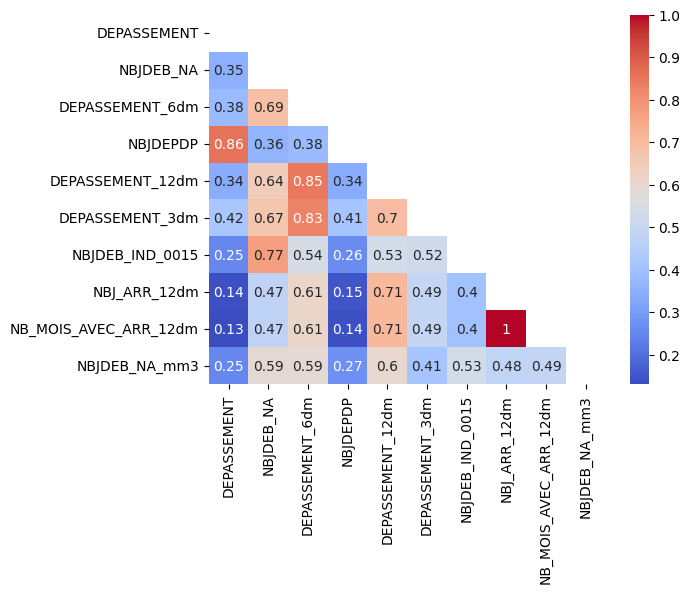

In [50]:
# Select the variables from top_10_p_values
variables = top_10_p_values['Variable'].tolist()

# Create a cross-tabulation of the selected variables
cross_tab = dataframe_sas[variables].corr(method='spearman').round(2)

mask = np.triu(np.ones_like(cross_tab, dtype=bool))

# Create a heatmap of the cross-tabulation
sns.heatmap(cross_tab, annot=True, cmap='coolwarm',mask=mask)

# Display the plot
plt.show()


NBJ_ARR_12dm et NB_MOIS_AVEC_ARR_12_dm sont très corrélé on ne garde que NBJ_ARR_12dm, de même Depassement et NBJDEPDP sont très corrélés on ne gardera que Depassement car ce sont les variables les plus corrélés à cible_2

In [15]:
quanti_save=top_10_p_values['Variable'].tolist()

elements_to_remove = ['NB_MOIS_AVEC_ARR_12dm', 'NBJDEPDP','DEPASSEMENT_12dm', 'DEPASSEMENT_3dm']

# Remove elements from the list using .remove() method
for item in elements_to_remove:
    quanti_save.remove(item)

print(quanti_save)

['DEPASSEMENT', 'NBJDEB_NA', 'DEPASSEMENT_6dm', 'NBJDEB_IND_0015', 'NBJ_ARR_12dm', 'NBJDEB_NA_mm3']


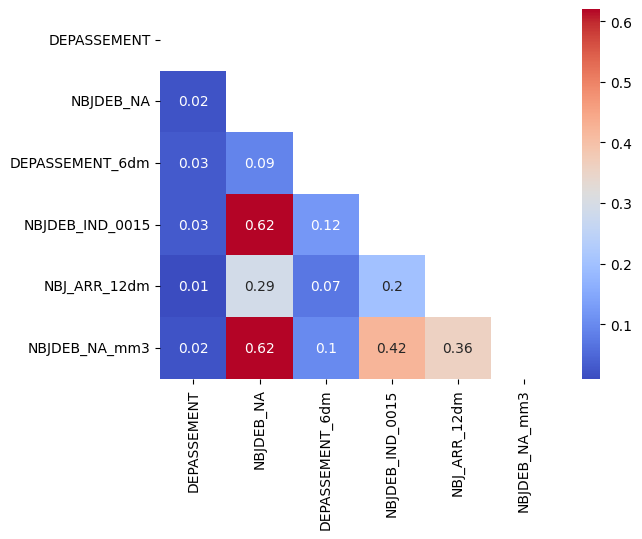

In [21]:
variables = quanti_save

# Create a cross-tabulation of the selected variables
cross_tab = dataframe_sas[variables].corr().round(2)

mask = np.triu(np.ones_like(cross_tab, dtype=bool))

# Create a heatmap of the cross-tabulation
sns.heatmap(cross_tab, annot=True, cmap='coolwarm',mask=mask)

# Display the plot
plt.show()

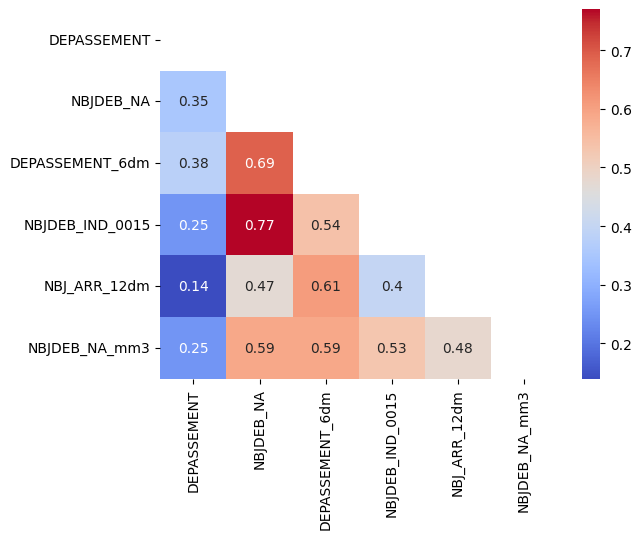

In [20]:
# Select the variables from top_10_p_values
variables = quanti_save

# Create a cross-tabulation of the selected variables
cross_tab = dataframe_sas[variables].corr(method='spearman').round(2)

mask = np.triu(np.ones_like(cross_tab, dtype=bool))

# Create a heatmap of the cross-tabulation
sns.heatmap(cross_tab, annot=True, cmap='coolwarm',mask=mask)

# Display the plot
plt.show()

V de cramer

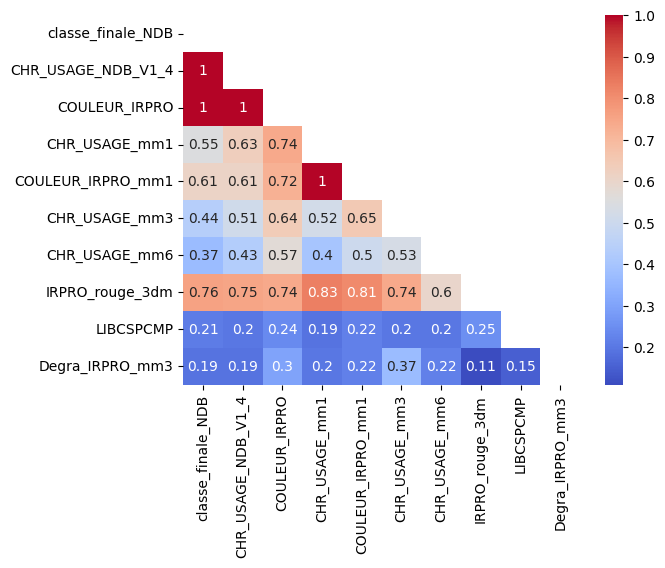

In [52]:
# Select the variables from top_10_quali_values
variables = top_10_quali_values['Variable'].tolist()

# Create an empty DataFrame to store the cross-tabulation results
cramer_table = pd.DataFrame(index=variables, columns=variables)

# Calculate the Cramer's V for each pair of variables
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            contingency_table = pd.crosstab(dataframe_sas[var1], dataframe_sas[var2])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            r, c = contingency_table.shape
            v_cramer = round((chi2 / (n * (min(r, c) - 1)))**0.5,2)
            cramer_table.loc[var1, var2] = v_cramer

# Display the cross-tabulation table
cramer_table = cramer_table.apply(pd.to_numeric, errors='coerce')

mask = np.triu(np.ones_like(cross_tab, dtype=bool))

# Create a heatmap of the cross-tabulation
sns.heatmap(cramer_table, annot=True, cmap='coolwarm',mask=mask)

# Display the plot
plt.show()

In [53]:
variables

['classe_finale_NDB',
 'CHR_USAGE_NDB_V1_4',
 'COULEUR_IRPRO',
 'CHR_USAGE_mm1',
 'COULEUR_IRPRO_mm1',
 'CHR_USAGE_mm3',
 'CHR_USAGE_mm6',
 'IRPRO_rouge_3dm',
 'LIBCSPCMP',
 'Degra_IRPRO_mm3']

variables liées :
On supprime : COULEUR_IRPRO et CHR_USAGE_NDB_V1_4 et on garde classe_finale_NDB
IRPRO_rouge_3dm car corrélé avec plein de var
COULEUR_IRPRO_mm1 et on garde CHR_USAGE_mm1

On ne gar de pas LIBCSPCMP car il y a beaucoup trop de modalité

In [54]:
quali_save=top_10_quali_values['Variable'].tolist()

elements_to_remove = ['COULEUR_IRPRO', 'CHR_USAGE_NDB_V1_4','IRPRO_rouge_3dm','COULEUR_IRPRO_mm1']

# Remove elements from the list using .remove() method
for item in elements_to_remove:
    quali_save.remove(item)

print(quali_save)

['classe_finale_NDB', 'CHR_USAGE_mm1', 'CHR_USAGE_mm3', 'CHR_USAGE_mm6', 'LIBCSPCMP', 'Degra_IRPRO_mm3']


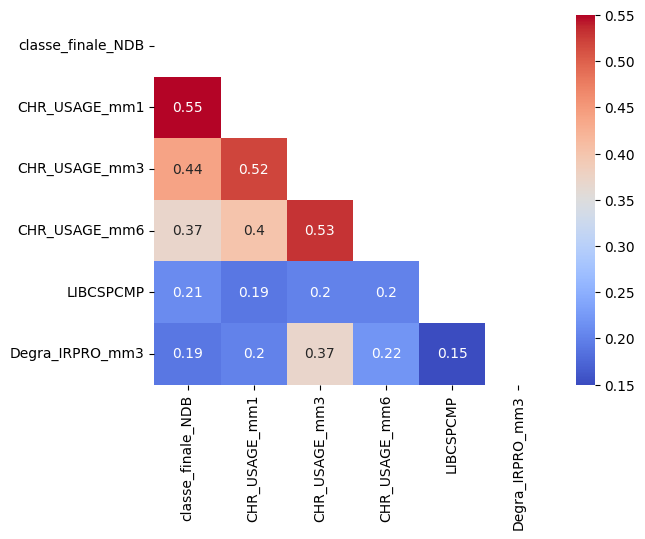

In [55]:
# Select the variables from top_10_quali_values
variables = top_10_quali_values['Variable'].tolist()
variables.remove('COULEUR_IRPRO')
variables.remove('CHR_USAGE_NDB_V1_4')
variables.remove('IRPRO_rouge_3dm')
variables.remove('COULEUR_IRPRO_mm1')

# Create an empty DataFrame to store the cross-tabulation results
cramer_table = pd.DataFrame(index=variables, columns=variables)

# Calculate the Cramer's V for each pair of variables
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            contingency_table = pd.crosstab(dataframe_sas[var1], dataframe_sas[var2])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            r, c = contingency_table.shape
            v_cramer = round((chi2 / (n * (min(r, c) - 1)))**0.5,2)
            cramer_table.loc[var1, var2] = v_cramer

# Display the cross-tabulation table
cramer_table = cramer_table.apply(pd.to_numeric, errors='coerce')

# Create a mask for the upper triangular part of the matrix
mask = np.triu(np.ones_like(cramer_table, dtype=bool))

# Create a heatmap of the cross-tabulation with the mask
sns.heatmap(cramer_table, annot=True, cmap='coolwarm', mask=mask)

# Display the plot
plt.show()


In [181]:
quanti_save=['DEPASSEMENT', 'NBJDEB_NA', 'DEPASSEMENT_6dm', 'NBJDEB_IND_0015', 'NBJ_ARR_12dm', 'NBJDEB_NA_mm3']

In [182]:
quali_save=['classe_finale_NDB', 'CHR_USAGE_mm1', 'CHR_USAGE_mm3', 'CHR_USAGE_mm6', 'Degra_IRPRO_mm3']

##  Discrétisation des variables

### Discrétisation des variables quantitatives

In [183]:
# Select the columns from the original dataframe
selected_columns = quali_save + quanti_save + ['cible_2']

df_var_final = dataframe_sas[selected_columns].copy()

# Transform 'cible_2' column into float type
df_var_final['cible_2'] = df_var_final['cible_2'].astype(float)

# Create a new dataframe with the selected columns
df_var_final = dataframe_sas[selected_columns].copy()

Nous allons regrouper les variables qualitatives

In [184]:
missing_values = df_var_final.isnull().sum()
print(missing_values)

classe_finale_NDB        0
CHR_USAGE_mm1            0
CHR_USAGE_mm3            0
CHR_USAGE_mm6            0
Degra_IRPRO_mm3          0
DEPASSEMENT              0
NBJDEB_NA                0
DEPASSEMENT_6dm       3337
NBJDEB_IND_0015          0
NBJ_ARR_12dm          3349
NBJDEB_NA_mm3        11702
cible_2                  0
dtype: int64


In [185]:
df_var_final['NBJDEB_NA_mm3'].fillna(df_var_final['NBJDEB_NA_mm3'].mean(), inplace=True)
df_var_final['NBJ_ARR_12dm'].fillna(df_var_final['NBJ_ARR_12dm'].mean(), inplace=True)
df_var_final['DEPASSEMENT_6dm'].fillna(df_var_final['DEPASSEMENT_6dm'].mean(), inplace=True)

####    DEPASSEMENT

In [186]:
# Discretize the 'DEPASSEMENT' variable into equal-sized bins
df_var_final['DEPASSEMENT_discretized_pre'] = pd.qcut(df_var_final['DEPASSEMENT'], q=200,duplicates='drop')

# Print the unique values and their counts in the new discretized variable
print(df_var_final['DEPASSEMENT_discretized_pre'].value_counts())

DEPASSEMENT_discretized_pre
(-0.001, 2.07]         548374
(2.07, 5.0]              3472
(50.55, 60.0]            3279
(8.12, 11.83]            3061
(30.88, 40.0]            2999
(64.38, 72.33]           2983
(83.03, 96.97]           2981
(671.849, 240528.5]      2981
(16.95, 23.66]           2980
(186.199, 671.849]       2980
(23.66, 30.88]           2979
(96.97, 186.199]         2978
(72.33, 83.03]           2977
(40.0, 50.55]            2960
(11.83, 16.95]           2903
(60.0, 64.38]            2682
(5.0, 8.12]              2483
Name: count, dtype: int64


                             Percentage of Observations  \
DEPASSEMENT_discretized_pre                               
(-0.001, 2.07]                                92.001033   
(2.07, 5.0]                                    0.582500   
(5.0, 8.12]                                    0.416574   
(8.12, 11.83]                                  0.513546   
(11.83, 16.95]                                 0.487038   
(16.95, 23.66]                                 0.499956   
(23.66, 30.88]                                 0.499789   
(30.88, 40.0]                                  0.503144   
(40.0, 50.55]                                  0.496601   
(50.55, 60.0]                                  0.550120   
(60.0, 64.38]                                  0.449961   
(64.38, 72.33]                                 0.500460   
(72.33, 83.03]                                 0.499453   
(83.03, 96.97]                                 0.500124   
(96.97, 186.199]                               0.499621 

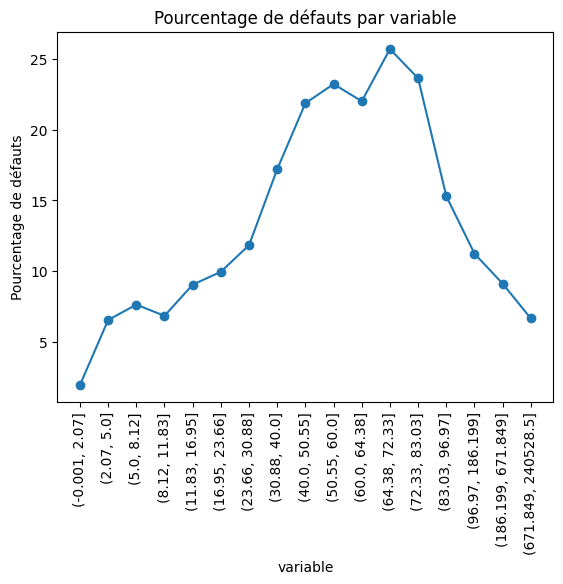

In [187]:
discretize_affiche(df_var_final, 'DEPASSEMENT_discretized_pre')

In [188]:
def borne_discretize_1(variable, a):
    # Create bins based on specified bounds
    bins = [-float('inf'), a, float('inf')]
    
    # Create labels for the categories
    labels = ['1', '2']
    
    # Use pd.cut to discretize the variable and create a new column
    df_var_final[variable+'_discretized'] = pd.cut(df_var_final[variable], bins=bins, labels=labels, include_lowest=True)

    # Print the unique values and their counts in the new discretized variable
    print(df_var_final[variable+'_discretized'].value_counts(normalize=True) * 100)

    # Calculate the default rate for each category
    default_rate = df_var_final[df_var_final['cible_2'] == '1'][variable+'_discretized'].value_counts()/df_var_final[variable+'_discretized'].value_counts() * 100

    # Display the default rate for each category
    print(default_rate)


In [189]:
borne_discretize_1('DEPASSEMENT', 2.07)

DEPASSEMENT_discretized
1    92.001033
2     7.998967
Name: proportion, dtype: float64
DEPASSEMENT_discretized
1     1.979488
2    14.232980
Name: count, dtype: float64


####    NBJDEB_NA

In [190]:
# Discretize the 'NBJDEB_NA' variable into equal-sized bins
df_var_final['NBJDEB_NA_discretized_pre'] = pd.qcut(df_var_final['NBJDEB_NA'], q=100, duplicates='drop')

# Print the unique values and their counts in the new discretized variable
print(df_var_final['NBJDEB_NA_discretized_pre'].value_counts(normalize=True) * 100)

NBJDEB_NA_discretized_pre
(-0.001, 1.0]    77.289565
(1.0, 2.0]        1.460611
(2.0, 3.0]        1.386624
(8.0, 10.0]       1.207613
(3.0, 4.0]        1.157282
(4.0, 5.0]        1.093529
(10.0, 12.0]      1.083966
(21.0, 25.0]      1.063666
(5.0, 6.0]        1.051251
(25.0, 28.0]      1.042526
(12.0, 14.0]      1.026588
(37.0, 45.0]      1.012999
(18.0, 21.0]      1.001590
(45.0, 55.0]      0.999913
(86.0, 92.0]      0.996725
(28.0, 32.0]      0.996557
(55.0, 64.0]      0.992363
(32.0, 37.0]      0.947233
(64.0, 86.0]      0.946226
(6.0, 7.0]        0.938509
(14.0, 16.0]      0.841202
(7.0, 8.0]        0.757316
(16.0, 18.0]      0.706146
Name: proportion, dtype: float64


In [191]:
def discretize_affiche(df, variable):
    # Calculate the percentage of observations for each category
    obs_percentage = df_var_final[variable].value_counts(normalize=True) * 100

    # Calculate the percentage of defaults for each category
    default_percentage = df_var_final[df_var_final['cible_2'] == '1'][variable].value_counts()/df_var_final[variable].value_counts() * 100

    # Create a DataFrame to store the results
    table_data = pd.DataFrame({'Percentage of Observations': obs_percentage, 'Percentage of Defaults': default_percentage})

    # Sort the DataFrame by the index (category)
    table_data.sort_index(inplace=True)

    # Display the table
    print(table_data)

    # Créer un graphique en ligne du pourcentage de défauts
    plt.plot(table_data.index.astype(str), table_data['Percentage of Defaults'], marker='o')

    # Ajouter des étiquettes et un titre au graphique
    plt.xlabel('variable')
    plt.ylabel('Pourcentage de défauts')
    plt.title('Pourcentage de défauts par variable')

    # Faire pivoter les étiquettes de l'axe x pour une meilleure visibilité
    plt.xticks(rotation=90)

    # Afficher le graphique
    plt.show()

                           Percentage of Observations  Percentage of Defaults
NBJDEB_NA_discretized_pre                                                    
(-0.001, 1.0]                               77.289565                1.255953
(1.0, 2.0]                                   1.460611                3.422927
(2.0, 3.0]                                   1.386624                4.065336
(3.0, 4.0]                                   1.157282                4.639026
(4.0, 5.0]                                   1.093529                4.970850
(5.0, 6.0]                                   1.051251                4.963294
(6.0, 7.0]                                   0.938509                5.237755
(7.0, 8.0]                                   0.757316                5.427559
(8.0, 10.0]                                  1.207613                5.570992
(10.0, 12.0]                                 1.083966                6.299334
(12.0, 14.0]                                 1.026588           

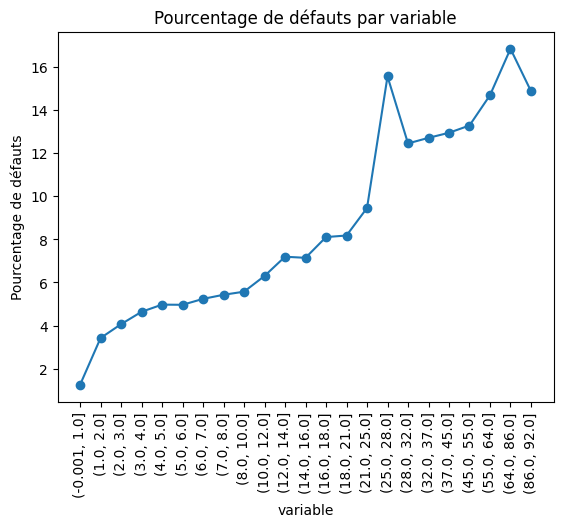

In [192]:
discretize_affiche(df_var_final, 'NBJDEB_NA_discretized_pre')

In [193]:
def borne_discretize(variable, a, b):
    # Create bins based on specified bounds
    bins = [-float('inf'), a, b, float('inf')]
    
    # Create labels for the categories
    labels = ['1', '2', '3']
    
    # Use pd.cut to discretize the variable and create a new column
    df_var_final[variable+'_discretized'] = pd.cut(df_var_final[variable], bins=bins, labels=labels, include_lowest=True)

    # Print the unique values and their counts in the new discretized variable
    print(df_var_final[variable+'_discretized'].value_counts(normalize=True) * 100)

    # Calculate the default rate for each category
    default_rate = df_var_final[df_var_final['cible_2'] == '1'][variable+'_discretized'].value_counts()/df_var_final[variable+'_discretized'].value_counts() * 100

    # Display the default rate for each category
    print(default_rate)


In [194]:
borne_discretize('NBJDEB_NA', 1.0, 25.0)

NBJDEB_NA_discretized
1    77.289565
2    14.775892
3     7.934543
Name: proportion, dtype: float64
NBJDEB_NA_discretized
1     1.255953
2     5.859978
3    14.154015
Name: count, dtype: float64


####    DEPASSEMENT_6dm

In [195]:
# Discretize the 'NBJ_ARR_12dm' variable into equal-sized bins
df_var_final['DEPASSEMENT_6dm_discretized_pre'] = pd.qcut(df_var_final['DEPASSEMENT_6dm'], q=100, duplicates='drop')

# Print the unique values and their counts in the new discretized variable
print(df_var_final['DEPASSEMENT_6dm_discretized_pre'].value_counts(normalize=True) * 100)

DEPASSEMENT_6dm_discretized_pre
(-0.001, 2.31]          83.000980
(9.53, 20.0]             1.023736
(3298.778, 6860.3]       1.000416
(137.439, 211.17]        1.000416
(591.189, 877.854]       1.000081
(69.939, 94.234]         1.000081
(877.854, 1314.51]       1.000081
(2005.438, 3298.778]     0.999913
(1314.51, 2005.438]      0.999913
(94.234, 137.439]        0.999913
(325.46, 393.844]        0.999913
(393.844, 591.189]       0.999913
(211.17, 325.46]         0.999745
(57.95, 69.939]          0.999745
(36.41, 57.95]           0.999745
(6860.3, 922783.24]      0.999745
(2.31, 9.53]             0.999074
(20.0, 36.41]            0.976593
Name: proportion, dtype: float64


                                 Percentage of Observations  \
DEPASSEMENT_6dm_discretized_pre                               
(-0.001, 2.31]                                    83.000980   
(2.31, 9.53]                                       0.999074   
(9.53, 20.0]                                       1.023736   
(20.0, 36.41]                                      0.976593   
(36.41, 57.95]                                     0.999745   
(57.95, 69.939]                                    0.999745   
(69.939, 94.234]                                   1.000081   
(94.234, 137.439]                                  0.999913   
(137.439, 211.17]                                  1.000416   
(211.17, 325.46]                                   0.999745   
(325.46, 393.844]                                  0.999913   
(393.844, 591.189]                                 0.999913   
(591.189, 877.854]                                 1.000081   
(877.854, 1314.51]                                 1.00

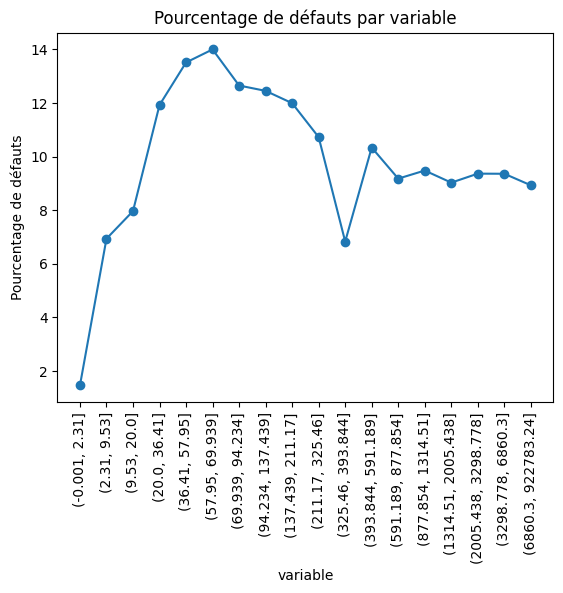

In [196]:
discretize_affiche(df_var_final, 'DEPASSEMENT_6dm_discretized_pre')

In [197]:
def borne_discretize_2(variable, a, b, c, d):
    # Create bins based on specified bounds
    bins = [-float('inf'), a, b, c, d, float('inf')]
    
    # Create labels for the categories
    labels = ['1', '2', '3', '2', '3']
    
    # Use pd.cut to discretize the variable and create a new column
    df_var_final[variable+'_discretized'] = pd.cut(df_var_final[variable], bins=bins, labels=labels, include_lowest=False, ordered=False)

    # Print the unique values and their counts in the new discretized variable
    print(df_var_final[variable+'_discretized'].value_counts(normalize=True) * 100)

    # Calculate the default rate for each category
    default_rate = df_var_final[df_var_final['cible_2'] == '1'][variable+'_discretized'].value_counts()/df_var_final[variable+'_discretized'].value_counts() * 100

    # Display the default rate for each category
    print(default_rate)


In [198]:
borne_discretize_2('DEPASSEMENT_6dm', 2.31, 20.0, 325.46, 393.844)

DEPASSEMENT_6dm_discretized
1    83.000980
3    13.976297
2     3.022723
Name: proportion, dtype: float64
DEPASSEMENT_6dm_discretized
1     1.463023
2     7.248710
3    10.919982
Name: count, dtype: float64


####    NBJ_ARR_12dm

In [199]:
# Discretize the 'NBJ_ARR_12dm' variable into equal-sized bins
df_var_final['NBJ_ARR_12dm_discretized_pre'] = pd.qcut(df_var_final['NBJ_ARR_12dm'], q=100, duplicates='drop')

# Print the unique values and their counts in the new discretized variable
print(df_var_final['NBJ_ARR_12dm_discretized_pre'].value_counts(normalize=True) * 100)

NBJ_ARR_12dm_discretized_pre
(-0.001, 1.0]     89.311503
(2.0, 3.0]         1.138995
(7.0, 10.0]        1.114165
(13.0, 20.0]       1.108293
(5.0, 7.0]         1.055109
(1.0, 2.0]         1.033467
(56.0, 1156.0]     0.994712
(33.0, 56.0]       0.978774
(20.0, 25.0]       0.960319
(25.0, 33.0]       0.931295
(10.0, 13.0]       0.845899
(3.0, 5.0]         0.527471
Name: proportion, dtype: float64


                              Percentage of Observations  \
NBJ_ARR_12dm_discretized_pre                               
(-0.001, 1.0]                                  89.311503   
(1.0, 2.0]                                      1.033467   
(2.0, 3.0]                                      1.138995   
(3.0, 5.0]                                      0.527471   
(5.0, 7.0]                                      1.055109   
(7.0, 10.0]                                     1.114165   
(10.0, 13.0]                                    0.845899   
(13.0, 20.0]                                    1.108293   
(20.0, 25.0]                                    0.960319   
(25.0, 33.0]                                    0.931295   
(33.0, 56.0]                                    0.978774   
(56.0, 1156.0]                                  0.994712   

                              Percentage of Defaults  
NBJ_ARR_12dm_discretized_pre                          
(-0.001, 1.0]                               2.032

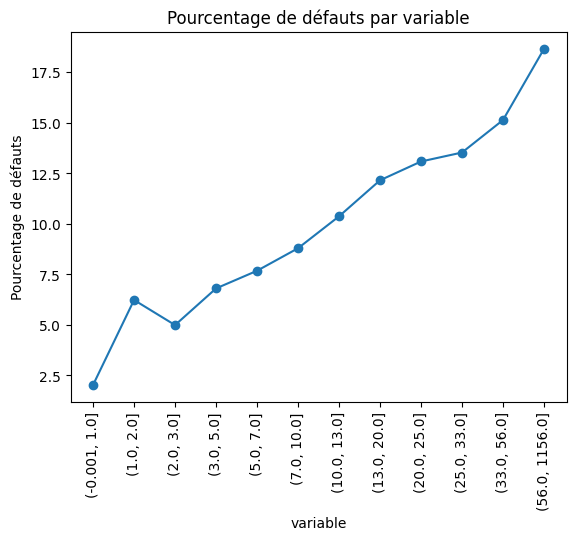

In [200]:
discretize_affiche(df_var_final, 'NBJ_ARR_12dm_discretized_pre')

In [201]:
borne_discretize('NBJ_ARR_12dm', 1.0, 13.0)

NBJ_ARR_12dm_discretized
1    89.311503
2     5.715105
3     4.973392
Name: proportion, dtype: float64
NBJ_ARR_12dm_discretized
1     2.032900
2     7.418171
3    14.478478
Name: count, dtype: float64


####    NBJDEB_IND_0015

In [202]:
df_var_final["NBJDEB_IND_0015"].isnull().sum()

0

In [203]:
# Discretize the 'NBJDEB_IND_0015' variable into equal-sized bins
df_var_final['NBJDEB_IND_0015_discretized_pre'] = pd.qcut(df_var_final['NBJDEB_IND_0015'], q=60, duplicates='drop')

# Print the unique values and their counts in the new discretized variable
print(df_var_final['NBJDEB_IND_0015_discretized_pre'].value_counts(normalize=True) * 100)

NBJDEB_IND_0015_discretized_pre
(-0.001, 1.0]    66.796689
(1.0, 3.0]        2.524612
(7.0, 10.0]       2.016603
(4.0, 6.0]        2.013750
(81.0, 89.0]      1.930201
(39.0, 47.0]      1.799675
(10.0, 13.0]      1.690121
(47.0, 55.0]      1.677035
(28.0, 33.0]      1.671331
(91.0, 92.0]      1.655225
(24.0, 28.0]      1.650695
(16.0, 20.0]      1.648849
(71.0, 81.0]      1.645997
(55.0, 62.0]      1.626536
(62.0, 71.0]      1.614121
(33.0, 39.0]      1.613450
(13.0, 16.0]      1.547348
(20.0, 24.0]      1.468832
(89.0, 91.0]      1.376054
(3.0, 4.0]        1.126076
(6.0, 7.0]        0.906800
Name: proportion, dtype: float64


                                 Percentage of Observations  \
NBJDEB_IND_0015_discretized_pre                               
(-0.001, 1.0]                                     66.796689   
(1.0, 3.0]                                         2.524612   
(3.0, 4.0]                                         1.126076   
(4.0, 6.0]                                         2.013750   
(6.0, 7.0]                                         0.906800   
(7.0, 10.0]                                        2.016603   
(10.0, 13.0]                                       1.690121   
(13.0, 16.0]                                       1.547348   
(16.0, 20.0]                                       1.648849   
(20.0, 24.0]                                       1.468832   
(24.0, 28.0]                                       1.650695   
(28.0, 33.0]                                       1.671331   
(33.0, 39.0]                                       1.613450   
(39.0, 47.0]                                       1.79

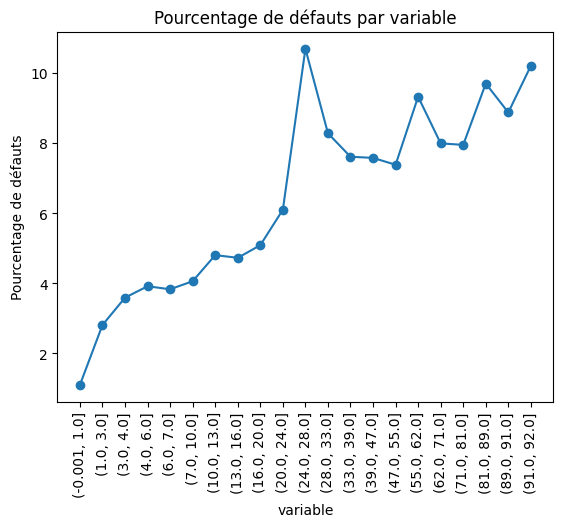

In [204]:
discretize_affiche(df_var_final, 'NBJDEB_IND_0015_discretized_pre')

In [205]:
borne_discretize('NBJDEB_IND_0015', 1.0, 24.0)

NBJDEB_IND_0015_discretized
1    66.796689
3    18.260320
2    14.942992
Name: proportion, dtype: float64
NBJDEB_IND_0015_discretized
1    1.103624
2    4.247317
3    8.695253
Name: count, dtype: float64


####    NBJDEB_NA_mm3

In [206]:
# Discretize the 'NBJDEB_NA_mm3' variable into equal-sized bins
df_var_final['NBJDEB_NA_mm3_discretized_pre'] = pd.qcut(df_var_final['NBJDEB_NA_mm3'], q=100, duplicates='drop')

# Print the unique values and their counts in the new discretized variable
print(df_var_final['NBJDEB_NA_mm3_discretized_pre'].value_counts(normalize=True) * 100)

NBJDEB_NA_mm3_discretized_pre
(-2.001, 0.0]    76.697671
(0.0, 1.0]        2.290572
(4.0, 4.301]      1.963252
(1.0, 2.0]        1.402730
(12.0, 15.0]      1.315489
(2.0, 3.0]        1.248381
(17.0, 21.0]      1.147886
(8.0, 10.0]       1.094871
(29.0, 35.0]      1.039674
(3.0, 4.0]        1.023736
(73.0, 92.0]      0.998403
(55.0, 73.0]      0.993537
(25.0, 29.0]      0.973741
(4.301, 5.0]      0.957299
(35.0, 43.0]      0.941696
(10.0, 12.0]      0.936495
(5.0, 6.0]        0.934986
(43.0, 55.0]      0.932301
(21.0, 25.0]      0.909652
(6.0, 7.0]        0.864857
(7.0, 8.0]        0.677290
(15.0, 17.0]      0.655480
Name: proportion, dtype: float64


                               Percentage of Observations  \
NBJDEB_NA_mm3_discretized_pre                               
(-2.001, 0.0]                                   76.697671   
(0.0, 1.0]                                       2.290572   
(1.0, 2.0]                                       1.402730   
(2.0, 3.0]                                       1.248381   
(3.0, 4.0]                                       1.023736   
(4.0, 4.301]                                     1.963252   
(4.301, 5.0]                                     0.957299   
(5.0, 6.0]                                       0.934986   
(6.0, 7.0]                                       0.864857   
(7.0, 8.0]                                       0.677290   
(8.0, 10.0]                                      1.094871   
(10.0, 12.0]                                     0.936495   
(12.0, 15.0]                                     1.315489   
(15.0, 17.0]                                     0.655480   
(17.0, 21.0]            

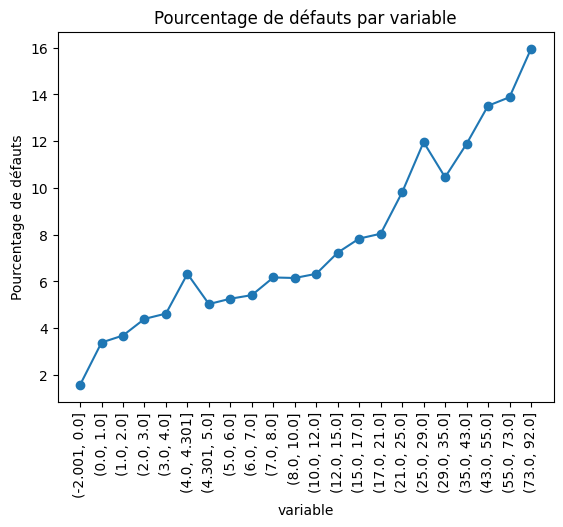

In [207]:
discretize_affiche(df_var_final, 'NBJDEB_NA_mm3_discretized_pre')

In [208]:
borne_discretize('NBJDEB_NA_mm3', 0.0, 21.0)

NBJDEB_NA_mm3_discretized
1    76.697671
2    16.513324
3     6.789005
Name: proportion, dtype: float64
NBJDEB_NA_mm3_discretized
1     1.569261
2     5.490308
3    12.511738
Name: count, dtype: float64


In [209]:
# Remove columns from df_var_final if the column name is in quanti_save
df_var_final = df_var_final.drop(columns=[col for col in df_var_final.columns if col in quanti_save])

# Print quali_save
print(quali_save)

['classe_finale_NDB', 'CHR_USAGE_mm1', 'CHR_USAGE_mm3', 'CHR_USAGE_mm6', 'Degra_IRPRO_mm3']


In [210]:
list_to_remove = [col + '_discretized_pre' for col in quanti_save]

df_var_final = df_var_final.drop(columns=[col for col in df_var_final.columns if col in list_to_remove])

### Discrétisation des variables qualitatives:

In [211]:
for variable in quali_save:
    counts = df_var_final[variable].value_counts()
    print(f"Variable: {variable}")
    print(counts)
    print()

Variable: classe_finale_NDB
classe_finale_NDB
 2    96562
 3    85939
 4    61883
 1    51909
 5    44501
 8    33528
 6    31188
 9    31143
12    30650
10    26403
15    25055
 7    23345
13    22842
14    16738
17     8090
16     5450
18      826
Name: count, dtype: int64

Variable: CHR_USAGE_mm1
CHR_USAGE_mm1
 1    151483
 2     86842
 8     63133
 3     62323
 7     57150
 5     56079
 4     45370
 6     34511
 9     24340
10      7223
 .      6841
11       755
91         2
Name: count, dtype: int64

Variable: CHR_USAGE_mm3
CHR_USAGE_mm3
 1    153044
 2     88325
 3     63279
 5     56004
 8     55590
 7     55211
 4     45973
 6     34685
 .     18531
 9     18424
10      5054
11      1922
91        10
Name: count, dtype: int64

Variable: CHR_USAGE_mm6
CHR_USAGE_mm6
 1    153986
 2     89623
 3     64079
 5     54884
 7     51067
 8     47996
 4     46097
 .     34225
 6     32989
 9     14681
10      3972
11      2440
91        13
Name: count, dtype: int64

Variable: Degra_IRPRO

####    classe_finale_NDB

In [212]:
# Calculate the percentage of observations for each category
obs_percentage = df_var_final['classe_finale_NDB'].value_counts(normalize=True) * 100

# Calculate the percentage of defaults for each category
default_percentage = df_var_final[df_var_final['cible_2'] == '1']['classe_finale_NDB'].value_counts()/df_var_final['classe_finale_NDB'].value_counts() * 100

# Create a DataFrame to store the results
table_data = pd.DataFrame({'Percentage of Observations': obs_percentage, 'Percentage of Defaults': default_percentage})

# Sort the DataFrame by the index (category)
table_data.sort_index(inplace=True)

# Display the table
table_data


,Percentage of Observations,Percentage of Defaults
classe_finale_NDB,,
1,8.708804,0.127146
2,16.200264,0.220584
3,14.418037,0.342103
4,10.382148,0.615678
5,7.465959,1.074133
6,5.232429,1.805181
7,3.916605,2.090383
8,5.625013,2.359222
9,5.224880,3.615580


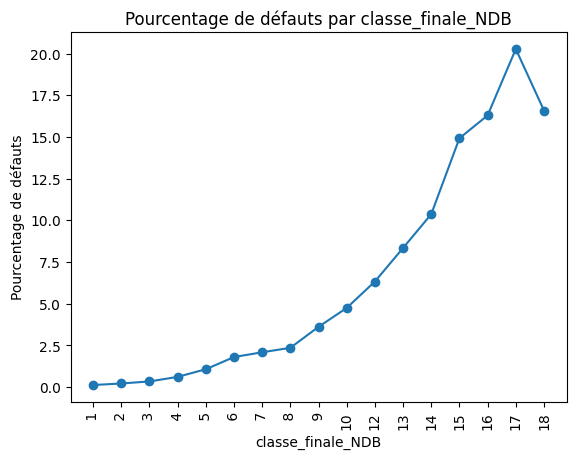

In [213]:
# Calculer le pourcentage de défauts pour chaque catégorie
pourcentage_defauts = df_var_final[df_var_final['cible_2'] == '1']['classe_finale_NDB'].value_counts()/df_var_final['classe_finale_NDB'].value_counts() * 100

# Créer un graphique en ligne du pourcentage de défauts
plt.plot(table_data.index, table_data['Percentage of Defaults'], marker='o')

# Ajouter des étiquettes et un titre au graphique
plt.xlabel('classe_finale_NDB')
plt.ylabel('Pourcentage de défauts')
plt.title('Pourcentage de défauts par classe_finale_NDB')

# Faire pivoter les étiquettes de l'axe x pour une meilleure visibilité
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()


In [214]:
# Create a dictionary to map the old categories to the new categories
category_mapping = {
    " 1": "1", " 2": "1", " 3": "1", " 4": "1", " 5": "1", " 6": "1", " 7": "1", " 8": "1",
    " 9": "2", "10": "2", "12": "2", "13": "2", "14": "2",
    "15": "3", "16": "3", "17": "3", "18": "3"
}

# Discretize the 'classe_finale_NDB' variable using the mapping dictionary
df_var_final['classe_finale_NDB_discretized'] = df_var_final['classe_finale_NDB'].map(category_mapping)

# Print the unique values and their counts in the new discretized variable
print(df_var_final['classe_finale_NDB_discretized'].value_counts(normalize=True) * 100)

# Calculate the default rate for each category
default_rate = df_var_final[df_var_final['cible_2'] == '1']['classe_finale_NDB_discretized'].value_counts()/df_var_final['classe_finale_NDB_discretized'].value_counts() * 100
# Display the default rate for each category
print(default_rate)


classe_finale_NDB_discretized
1    71.949259
2    21.437056
3     6.613685
Name: proportion, dtype: float64
classe_finale_NDB_discretized
1     0.763428
2     6.232000
3    16.245149
Name: count, dtype: float64


####    CHR_USAGE_mm1

In [215]:
# Calculate the percentage of observations for each category
obs_percentage = df_var_final['CHR_USAGE_mm1'].value_counts(normalize=True) * 100

# Calculate the percentage of defaults for each category
default_percentage = df_var_final[df_var_final['cible_2'] == '1']['CHR_USAGE_mm1'].value_counts()/df_var_final['CHR_USAGE_mm1'].value_counts() * 100

# Create a DataFrame to store the results
table_data = pd.DataFrame({'Percentage of Observations': obs_percentage, 'Percentage of Defaults': default_percentage})

# Sort the DataFrame by the index (category)
table_data.sort_index(inplace=True)

# Display the table
table_data


,Percentage of Observations,Percentage of Defaults
CHR_USAGE_mm1,,
.,1.147719,6.022511
1,25.414393,0.235670
2,14.569534,0.485940
3,10.455967,0.760554
4,7.611752,1.492175
5,9.408407,2.364521
6,5.789931,3.233752
7,9.588090,4.761155
8,10.591861,8.315778


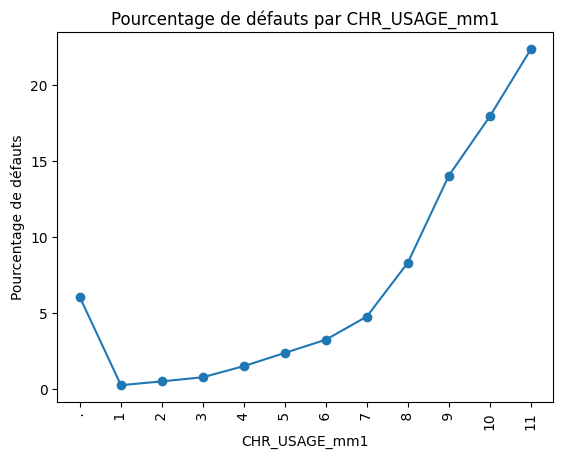

In [216]:
# Calculer le pourcentage de défauts pour chaque catégorie
pourcentage_defauts = df_var_final[df_var_final['cible_2'] == '1']['CHR_USAGE_mm1'].value_counts()/df_var_final['CHR_USAGE_mm1'].value_counts() * 100


# Créer un graphique en ligne du pourcentage de défauts
plt.plot(table_data.index, table_data['Percentage of Defaults'], marker='o')

# Ajouter des étiquettes et un titre au graphique
plt.xlabel('CHR_USAGE_mm1')
plt.ylabel('Pourcentage de défauts')
plt.title('Pourcentage de défauts par CHR_USAGE_mm1')

# Faire pivoter les étiquettes de l'axe x pour une meilleure visibilité
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()


In [217]:
# Create a dictionary to map the old categories to the new categories
category_mapping = {
    " 1": "1", " 2": "1", " 3": "1", " 4": "1", " 5": "1", " 6": "1", " 7": "1", " .": "1",
    " 8": "2", 
    " 9": "3","10": "3", "11": "3","91": "3"
}

# Discretize the 'CHR_USAGE_mm1' variable using the mapping dictionary
df_var_final['CHR_USAGE_mm1_discretized'] = df_var_final['CHR_USAGE_mm1'].map(category_mapping)

# Print the unique values and their counts in the new discretized variable
print(df_var_final['CHR_USAGE_mm1_discretized'].value_counts(normalize=True) * 100)

# Calculate the default rate for each category
default_rate = df_var_final[df_var_final['cible_2'] == '1']['CHR_USAGE_mm1_discretized'].value_counts()/df_var_final['CHR_USAGE_mm1_discretized'].value_counts() * 100
# Display the default rate for each category
print(default_rate)


CHR_USAGE_mm1_discretized
1    83.985793
2    10.591861
3     5.422346
Name: proportion, dtype: float64
CHR_USAGE_mm1_discretized
1     1.499204
2     8.315778
3    15.117574
Name: count, dtype: float64


On supose que les 91 était une fautes de frappes et que ça signifait 9

####    CHR_USAGE_mm3

In [218]:
# Calculate the percentage of observations for each category
obs_percentage = df_var_final['CHR_USAGE_mm3'].value_counts(normalize=True) * 100

# Calculate the percentage of defaults for each category
default_percentage = df_var_final[df_var_final['cible_2'] == '1']['CHR_USAGE_mm3'].value_counts()/df_var_final['CHR_USAGE_mm3'].value_counts() * 100

# Create a DataFrame to store the results
table_data = pd.DataFrame({'Percentage of Observations': obs_percentage, 'Percentage of Defaults': default_percentage})

# Sort the DataFrame by the index (category)
table_data.sort_index(inplace=True)

# Display the table
table_data


,Percentage of Observations,Percentage of Defaults
CHR_USAGE_mm3,,
.,3.108957,6.918137
1,25.676283,0.333891
2,14.818338,0.655534
3,10.616356,1.085668
4,7.712918,1.807583
5,9.395825,2.746232
6,5.819123,3.932536
7,9.262782,4.879462
8,9.326367,8.048210


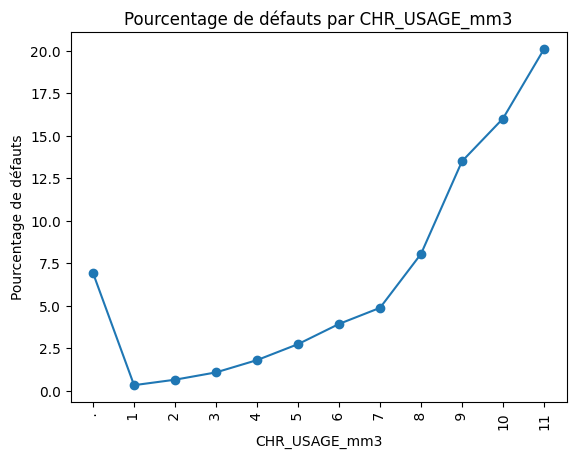

In [219]:
# Calculer le pourcentage de défauts pour chaque catégorie
pourcentage_defauts = df_var_final[df_var_final['cible_2'] == '1']['CHR_USAGE_mm3'].value_counts()/df_var_final['CHR_USAGE_mm3'].value_counts() * 100


# Créer un graphique en ligne du pourcentage de défauts
plt.plot(table_data.index, table_data['Percentage of Defaults'], marker='o')

# Ajouter des étiquettes et un titre au graphique
plt.xlabel('CHR_USAGE_mm3')
plt.ylabel('Pourcentage de défauts')
plt.title('Pourcentage de défauts par CHR_USAGE_mm3')

# Faire pivoter les étiquettes de l'axe x pour une meilleure visibilité
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()


In [220]:
# Create a dictionary to map the old categories to the new categories
category_mapping = {
    " 1": "1", " 2": "1", " 3": "1", " 4": "1", " 5": "1", " 6": "1", " 7": "1", 
    " .": "2", " 8": "2", 
    " 9": "3","10": "3", "11": "3","91": "3"
}

# Discretize the 'CHR_USAGE_mm3' variable using the mapping dictionary
df_var_final['CHR_USAGE_mm3_discretized'] = df_var_final['CHR_USAGE_mm3'].map(category_mapping)

# Print the unique values and their counts in the new discretized variable
print(df_var_final['CHR_USAGE_mm3_discretized'].value_counts(normalize=True) * 100)

# Calculate the default rate for each category
default_rate = df_var_final[df_var_final['cible_2'] == '1']['CHR_USAGE_mm3_discretized'].value_counts()/df_var_final['CHR_USAGE_mm3_discretized'].value_counts() * 100

# Display the default rate for each category
print(default_rate)


CHR_USAGE_mm3_discretized
1    83.301625
2    12.435324
3     4.263051
Name: proportion, dtype: float64
CHR_USAGE_mm3_discretized
1     1.652297
2     7.765680
3    14.486423
Name: count, dtype: float64


In [221]:
df_var_final['CHR_USAGE_mm3_discretized'].isnull().sum()

0

####    CHR_USAGE_mm6

In [222]:
# Calculate the percentage of observations for each category
obs_percentage = df_var_final['CHR_USAGE_mm6'].value_counts(normalize=True) * 100

# Calculate the percentage of defaults for each category
default_percentage = df_var_final[df_var_final['cible_2'] == '1']['CHR_USAGE_mm6'].value_counts()/df_var_final['CHR_USAGE_mm6'].value_counts() * 100

# Create a DataFrame to store the results
table_data = pd.DataFrame({'Percentage of Observations': obs_percentage, 'Percentage of Defaults': default_percentage})

# Sort the DataFrame by the index (category)
table_data.sort_index(inplace=True)

# Display the table
table_data

,Percentage of Observations,Percentage of Defaults
CHR_USAGE_mm6,,
.,5.741949,6.369613
1,25.834323,0.433806
2,15.036104,0.850228
3,10.750572,1.267186
4,7.733721,2.134629
5,9.207921,2.911595
6,5.534584,4.031647
7,8.567541,4.967983
8,8.052318,7.846487


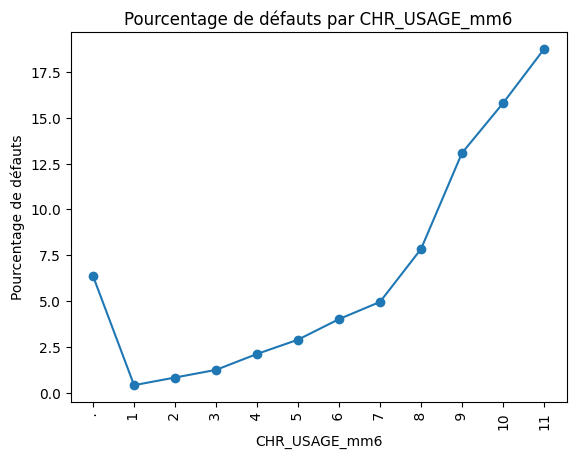

In [223]:
# Calculer le pourcentage de défauts pour chaque catégorie
pourcentage_defauts = df_var_final[df_var_final['cible_2'] == '1']['CHR_USAGE_mm6'].value_counts()/df_var_final['CHR_USAGE_mm6'].value_counts() * 100


# Créer un graphique en ligne du pourcentage de défauts
plt.plot(table_data.index, table_data['Percentage of Defaults'], marker='o')

# Ajouter des étiquettes et un titre au graphique
plt.xlabel('CHR_USAGE_mm6')
plt.ylabel('Pourcentage de défauts')
plt.title('Pourcentage de défauts par CHR_USAGE_mm6')

# Faire pivoter les étiquettes de l'axe x pour une meilleure visibilité
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()


In [224]:
# Create a dictionary to map the old categories to the new categories
category_mapping = {
    " 1": "1", " 2": "1", " 3": "1", " 4": "1", " 5": "1", " 6": "1", " 7": "1", " .": "1",
    " 8": "2", 
    " 9": "3","10": "3", "11": "3","91": "3"
}

# Discretize the 'CHR_USAGE_mm6' variable using the mapping dictionary
df_var_final['CHR_USAGE_mm6_discretized'] = df_var_final['CHR_USAGE_mm6'].map(category_mapping)

# Print the unique values and their counts in the new discretized variable
print(df_var_final['CHR_USAGE_mm6_discretized'].value_counts(normalize=True) * 100)

# Calculate the default rate for each category
default_rate = df_var_final[df_var_final['cible_2'] == '1']['CHR_USAGE_mm6_discretized'].value_counts()/df_var_final['CHR_USAGE_mm6_discretized'].value_counts() * 100

# Display the default rate for each category
print(default_rate)


CHR_USAGE_mm6_discretized
1    88.406716
2     8.052318
3     3.540966
Name: proportion, dtype: float64
CHR_USAGE_mm6_discretized
1     2.063004
2     7.846487
3    14.232920
Name: count, dtype: float64


####    Degra_IRPRO_mm3

In [225]:
# Calculate the percentage of observations for each category
obs_percentage = df_var_final['Degra_IRPRO_mm3'].value_counts(normalize=True) * 100

# Calculate the percentage of defaults for each category
default_percentage = df_var_final[df_var_final['cible_2'] == '1']['Degra_IRPRO_mm3'].value_counts()/df_var_final['Degra_IRPRO_mm3'].value_counts() * 100

# Create a DataFrame to store the results
table_data = pd.DataFrame({'Percentage of Observations': obs_percentage, 'Percentage of Defaults': default_percentage})

# Sort the DataFrame by the index (category)
table_data.sort_index(inplace=True)

# Display the table
table_data

,Percentage of Observations,Percentage of Defaults
Degra_IRPRO_mm3,,
*,22.161657,5.517998
.,3.433090,8.151297
0,57.938569,1.782860
1,10.266051,3.168767
2,4.227651,1.571491
3,1.552885,1.534140
4,0.323965,1.967892
5,0.077342,2.386117
6,0.016945,0.990099


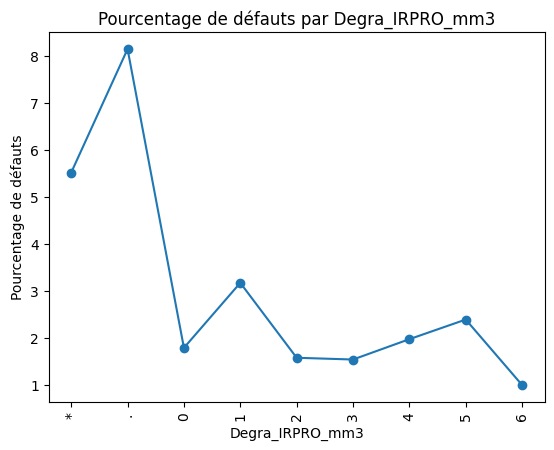

In [226]:
# Calculer le pourcentage de défauts pour chaque catégorie
pourcentage_defauts = df_var_final[df_var_final['cible_2'] == '1']['Degra_IRPRO_mm3'].value_counts()/df_var_final['Degra_IRPRO_mm3'].value_counts() * 100


# Créer un graphique en ligne du pourcentage de défauts
plt.plot(table_data.index, table_data['Percentage of Defaults'], marker='o')

# Ajouter des étiquettes et un titre au graphique
plt.xlabel('Degra_IRPRO_mm3')
plt.ylabel('Pourcentage de défauts')
plt.title('Pourcentage de défauts par Degra_IRPRO_mm3')

# Faire pivoter les étiquettes de l'axe x pour une meilleure visibilité
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()


In [227]:
# Create a dictionary to map the old categories to the new categories
category_mapping = {
    "0": "1","1": "1", "2": "1", "3": "1", "4": "1", "5": "1", "6": "1", "7": "1", 
    ".": "2", "*": "2"
}

# Discretize the 'Degra_IRPRO_mm3' variable using the mapping dictionary
df_var_final['Degra_IRPRO_mm3_discretized'] = df_var_final['Degra_IRPRO_mm3'].map(category_mapping)

# Print the unique values and their counts in the new discretized variable
print(df_var_final['Degra_IRPRO_mm3_discretized'].value_counts(normalize=True) * 100)

# Calculate the default rate for each category
default_rate = df_var_final[df_var_final['cible_2'] == '1']['Degra_IRPRO_mm3_discretized'].value_counts()/df_var_final['Degra_IRPRO_mm3_discretized'].value_counts() * 100

# Display the default rate for each category
print(default_rate)

Degra_IRPRO_mm3_discretized
1    74.405253
2    25.594747
Name: proportion, dtype: float64
Degra_IRPRO_mm3_discretized
1    1.958087
2    5.871210
Name: count, dtype: float64


In [228]:
# Remove columns from df_var_final if the column name is in quanti_save
df_var_final = df_var_final.drop(columns=[col for col in df_var_final.columns if col in quali_save])

# Print quali_save
print(quali_save)

['classe_finale_NDB', 'CHR_USAGE_mm1', 'CHR_USAGE_mm3', 'CHR_USAGE_mm6', 'Degra_IRPRO_mm3']


In [229]:
list_to_remove = [col + '_discretized_pre' for col in quali_save]

df_var_final = df_var_final.drop(columns=[col for col in df_var_final.columns if col in list_to_remove])

### Test de Discrétization avec K-mean :

In [230]:
#2 variables à discrétiser
data_to_discretize=dataframe_sas[quanti_save]
#Nombre de classes
bins=5

In [231]:
missing_values = data_to_discretize.isnull().sum()
print(missing_values)

DEPASSEMENT            0
NBJDEB_NA              0
DEPASSEMENT_6dm     3337
NBJDEB_IND_0015        0
NBJ_ARR_12dm        3349
NBJDEB_NA_mm3      11702
dtype: int64


In [232]:
data_to_discretize['NBJDEB_NA_mm3'].fillna(data_to_discretize['NBJDEB_NA_mm3'].mean(), inplace=True)
data_to_discretize['NBJ_ARR_12dm'].fillna(data_to_discretize['NBJ_ARR_12dm'].mean(), inplace=True)
data_to_discretize['DEPASSEMENT_6dm'].fillna(data_to_discretize['DEPASSEMENT_6dm'].mean(), inplace=True)

C:\Users\cedri\AppData\Local\Temp\ipykernel_15952\356652430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_discretize['NBJDEB_NA_mm3'].fillna(data_to_discretize['NBJDEB_NA_mm3'].mean(), inplace=True)
C:\Users\cedri\AppData\Local\Temp\ipykernel_15952\356652430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_discretize['NBJ_ARR_12dm'].fillna(data_to_discretize['NBJ_ARR_12dm'].mean(), inplace=True)
C:\Users\cedri\AppData\Local\Temp\ipykernel_15952\356652430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

In [233]:
from sklearn.preprocessing import KBinsDiscretizer
Discretizor=KBinsDiscretizer(n_bins=bins,encode="ordinal",strategy="kmeans")
Discretizor.fit_transform(data_to_discretize)

#meilleur vue du résultat
df_disc_kmeans=pd.DataFrame(Discretizor.fit_transform(data_to_discretize),columns=data_to_discretize.columns,dtype="int")
df_disc_kmeans.head()

c:\Users\cedri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


c:\Users\cedri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,DEPASSEMENT,NBJDEB_NA,DEPASSEMENT_6dm,NBJDEB_IND_0015,NBJ_ARR_12dm,NBJDEB_NA_mm3
0,0,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [234]:
percentages = df_disc_kmeans.apply(lambda x: x.value_counts(normalize=True) * 100)
print(percentages)

   DEPASSEMENT  NBJDEB_NA  DEPASSEMENT_6dm  NBJDEB_IND_0015  NBJ_ARR_12dm  \
0    99.925342  84.377370        99.421863        74.780892     95.995819   
1     0.067444   7.184776         0.534853         8.992336      3.638273   
2     0.005872   4.393912         0.040433         5.531229      0.304504   
3     0.001174   2.500453         0.002517         4.719722      0.045130   
4     0.000168   1.543489         0.000336         5.975821      0.016274   

   NBJDEB_NA_mm3  
0      87.383483  
1       6.305993  
2       3.479898  
3       1.766624  
4       1.064001  


### Etude de la corrélation entre les variables transformées.

In [235]:
df_var_final

,cible_2,DEPASSEMENT_discretized,NBJDEB_NA_discretized,DEPASSEMENT_6dm_discretized,NBJ_ARR_12dm_discretized,NBJDEB_IND_0015_discretized,NBJDEB_NA_mm3_discretized,classe_finale_NDB_discretized,CHR_USAGE_mm1_discretized,CHR_USAGE_mm3_discretized,CHR_USAGE_mm6_discretized,Degra_IRPRO_mm3_discretized
0,0,1,1,1,1,1,1,1,1,1,1,1
1,0,1,1,1,1,3,1,1,1,1,1,2
2,0,1,1,1,1,1,1,1,1,1,1,1
3,0,1,1,1,1,1,1,1,1,1,1,1
4,0,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
596047,1,1,3,3,3,3,2,2,2,3,1,1
596048,1,1,2,2,1,2,1,2,1,2,1,2
596049,1,1,3,3,3,3,2,2,1,3,1,1
596050,1,1,3,3,1,3,2,1,1,1,1,1


In [236]:
# Variable cible
cible = 'cible_2'

# Création d'un DataFrame pour stocker les résultats
resultats_tests_qualitatifs = pd.DataFrame(columns=['Variable', 'Stat. du X2', 'p-valeur', 'V de Cramer', 'T de Tschupro'])

# Calcul des statistiques pour chaque variable qualitative
for variable in df_var_final.columns:
    if variable != cible:
        contingency_table = pd.crosstab(df_var_final[cible], df_var_final[variable])
        
        # Test du chi2_contingency
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        
        # Calcul du V de Cramer
        n = contingency_table.sum().sum()
        r, c = contingency_table.shape
        v_cramer = (chi2 / (n * (min(r, c) - 1)))**0.5
        
        # Calcul du T de Tschupro
        k1 = len(df_var_final[variable].unique())
        k2 = len(df_var_final[cible].unique())
        t_tschupro_max = ((min(k1 - 1, k2 - 1) / max(k1 - 1, k2 - 1))**(1/4))
        t_tschupro = (chi2 / (n * (k1 - 1) * (k2 - 1))**0.5)
        
        # Normalisation de T de Tschupro entre [1, T_max]
        t_tschupro_normalized = 1 + (t_tschupro_max - 1) * t_tschupro
        
        # Ajout des résultats au DataFrame
        resultats_tests_qualitatifs = pd.concat([resultats_tests_qualitatifs, pd.DataFrame({
            'Variable': [variable],
            'Stat. du X2': [chi2],
            'p-valeur': [p_value],
            'V de Cramer': [v_cramer],
            'T de Tschupro': [t_tschupro_normalized]
        })], ignore_index=True)

# Tri du DataFrame par V de Cramer du plus grand au plus petit
resultats_tests_qualitatifs = resultats_tests_qualitatifs.sort_values(by='V de Cramer', ascending=False)

# Affichage du DataFrame
print(resultats_tests_qualitatifs)

C:\Users\cedri\AppData\Local\Temp\ipykernel_15952\1813826362.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultats_tests_qualitatifs = pd.concat([resultats_tests_qualitatifs, pd.DataFrame({


                         Variable   Stat. du X2  p-valeur  V de Cramer  \
6   classe_finale_NDB_discretized  36192.932725       0.0     0.246417   
1           NBJDEB_NA_discretized  27870.804289       0.0     0.216238   
7       CHR_USAGE_mm1_discretized  26657.925702       0.0     0.211481   
2     DEPASSEMENT_6dm_discretized  23392.457367       0.0     0.198105   
0         DEPASSEMENT_discretized  22927.577350       0.0     0.196127   
8       CHR_USAGE_mm3_discretized  20671.042333       0.0     0.186225   
5       NBJDEB_NA_mm3_discretized  18127.632041       0.0     0.174393   
4     NBJDEB_IND_0015_discretized  17756.594972       0.0     0.172599   
3        NBJ_ARR_12dm_discretized  17644.687080       0.0     0.172054   
9       CHR_USAGE_mm6_discretized  14805.279783       0.0     0.157604   
10    Degra_IRPRO_mm3_discretized   6050.568721       0.0     0.100753   

    T de Tschupro  
6       -4.274079  
1       -3.061368  
7       -2.884626  
2       -2.408778  
0        1.

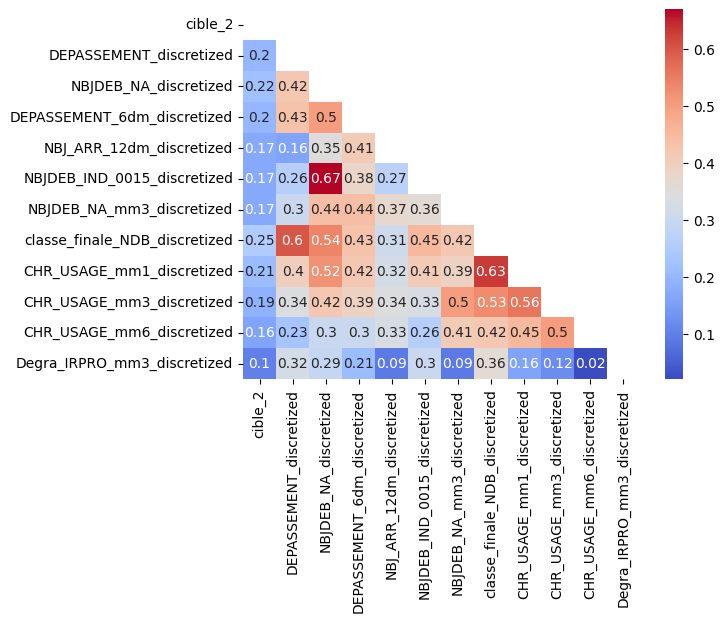

In [237]:
# Create an empty DataFrame to store the cross-tabulation results
cramer_table = pd.DataFrame(index=df_var_final.columns, columns=df_var_final.columns)

# Calculate the Cramer's V for each pair of variables
for var1 in df_var_final.columns:
    for var2 in df_var_final.columns:
        if var1 != var2:
            contingency_table = pd.crosstab(df_var_final[var1], df_var_final[var2])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            r, c = contingency_table.shape
            v_cramer = round((chi2 / (n * (min(r, c) - 1)))**0.5,2)
            cramer_table.loc[var1, var2] = v_cramer

# Display the cross-tabulation table
cramer_table = cramer_table.apply(pd.to_numeric, errors='coerce')

mask = np.triu(np.ones_like(cramer_table, dtype=bool))

# Create a heatmap of the cross-tabulation
sns.heatmap(cramer_table, annot=True, cmap='coolwarm',mask=mask)

# Display the plot
plt.show()